# Data Loading & Preparation

In [1]:
import pandas as pd

# Load the Excel file
file_path = "DATA_final.xlsx"  
xls = pd.ExcelFile(file_path)

# Check sheet names
print(xls.sheet_names)

# Load the relevant sheet
df = xls.parse('Sheet1')
df["TOTALHIGH_2023"] = df["TOTALHIGH_2023"] / 1_000_000
# Display the first few rows
df.head()


['Sheet1']


,CTY_CODE,COUNTRY,Sub-region Name,ART5,MEPS_2023,KIG_2023,ELEP_2023,RECOOL_2023,INC_2023,RQUAL_2023,...,DATAINF_2023,AIPI_2023,GDPCAPITA_2023,GDP_2023,TOTALHIGH_2023,RURAL_HIGHRISK_2023,URBA_HIGHRISK_2023,MEDIUMRISK_2023,LOWRISK_2023,MEDLOWRISK_2023
0,AFG,Afghanistan,Southern Asia,ART 5,0.000000,NaN,50.476190,0.000000,20.000000,-1.266425,...,55.0,NaN,2201.722907,17152.234637,1.252442,0.000000e+00,1.252442e+06,0.000000e+00,0.000000e+00,0.000000e+00
1,AGO,Angola,Sub-Saharan Africa,ART 5,0.000000,Ratification,81.904762,0.000000,20.000000,-0.761388,...,50.0,0.259659,8046.817299,84875.162197,25.783735,5.458703e+06,2.032503e+07,6.379564e+06,2.619504e+06,8.999068e+06
2,ALB,Albania,Southern Europe,ART 5,55.555556,Ratification,NaN,33.333333,33.333333,0.171954,...,95.0,0.526793,21259.797781,23547.180412,NaN,NaN,NaN,NaN,NaN,NaN
3,ARE,United Arab Emirates,Western Asia,ART 5,66.666667,NaN,NaN,33.333333,56.666667,1.042391,...,85.0,0.628185,76110.384842,514130.432648,NaN,NaN,NaN,NaN,NaN,NaN
4,ARG,Argentina,Latin America and the Caribbean,ART 5,0.000000,Ratification,NaN,0.000000,40.000000,-0.482535,...,70.0,0.473809,30082.304525,646075.277525,5.252488,1.344895e+05,5.117998e+06,5.757169e+06,1.387371e+07,1.963088e+07


In [2]:
# Count missing values for all columns
na_counts_all = df.isna().sum().sort_values(ascending=False)

# Calculate the percentage of missing values
na_percent_all = (na_counts_all / len(df)) * 100

# Combine into a summary DataFrame
na_summary_all = pd.DataFrame({
    "Missing Values": na_counts_all,
    "Percent Missing": na_percent_all.round(2)
})

# Add a row for total number of observations
na_summary_all.loc["Total Observations"] = [len(df), 0.0]

# Display the summary
na_summary_all

,Missing Values,Percent Missing
ELEP_2023,140.0,71.43
MEDLOWRISK_2023,120.0,61.22
TOTALHIGH_2023,120.0,61.22
RURAL_HIGHRISK_2023,120.0,61.22
URBA_HIGHRISK_2023,120.0,61.22
MEDIUMRISK_2023,120.0,61.22
LOWRISK_2023,120.0,61.22
ODA_2022,68.0,34.69
MEPS_2023,58.0,29.59
RECOOL_2023,58.0,29.59


In [3]:
# Calculate missing counts and percentages by ART5 category
na_counts = df.groupby("ART5").apply(lambda x: x.isna().sum()).T
na_percent = df.groupby("ART5").apply(lambda x: x.isna().mean() * 100).T.round(2)

# Rename columns for clarity
na_counts.columns = [f"{col} - Missing" for col in na_counts.columns]
na_percent.columns = [f"{col} - % Missing" for col in na_percent.columns]

# Combine counts and percentages side by side
na_summary_by_art5 = pd.concat([na_counts, na_percent], axis=1)

# Display the result
na_summary_by_art5

/tmp/ipykernel_147/1900515775.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  na_counts = df.groupby("ART5").apply(lambda x: x.isna().sum()).T
/tmp/ipykernel_147/1900515775.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  na_percent = df.groupby("ART5").apply(lambda x: x.isna().mean() * 100).T.round(2)


,ART 5 - Missing,NON-ART 5 - Missing,ART 5 - % Missing,NON-ART 5 - % Missing
CTY_CODE,0,0,0.00,0.00
COUNTRY,0,0,0.00,0.00
Sub-region Name,0,0,0.00,0.00
ART5,0,0,0.00,0.00
MEPS_2023,45,13,30.61,26.53
KIG_2023,35,7,23.81,14.29
ELEP_2023,91,49,61.90,100.00
RECOOL_2023,45,13,30.61,26.53
INC_2023,45,13,30.61,26.53
RQUAL_2023,0,1,0.00,2.04


In [4]:
# Define the list of key numerical variables
numerical_cols = [
    "MEPS_2023", "RECOOL_2023", "INC_2023", "RQUAL_2023", "FIN_2023",
    "AIPI_2023", "GDPCAPITA_2023"
]

# Set your exclusion threshold
threshold = 2  # Exclude countries missing more than 25% of variables

# Count missing variables per country
missing_count = df.set_index("COUNTRY")[numerical_cols].isna().sum(axis=1)

# Filter countries with missing data above the threshold
high_missing = missing_count[missing_count > threshold]

# Get metadata for those countries
meta = df.set_index("COUNTRY").loc[high_missing.index, ["CTY_CODE", "ART5"]]

# Combine metadata and missing count
filtered_countries = meta.copy()
filtered_countries["Missing Variables Count"] = high_missing

# Display result
filtered_countries.sort_values(by="Missing Variables Count", ascending=False)


,CTY_CODE,ART5,Missing Variables Count
COUNTRY,,,
Holy See,VAT,NON-ART 5,7
Cuba,CUB,ART 5,6
Niue,NIU,ART 5,6
Cook Islands,COK,ART 5,6
Democratic People's Republic of Korea,PRK,ART 5,6
St. Kitts and Nevis,KNA,ART 5,5
Marshall Islands,MHL,ART 5,5
Nauru,NRU,ART 5,5
Palau,PLW,ART 5,5


In [5]:
# List of CTY_CODEs to remove (58 countries)
cty_codes_to_remove = filtered_countries["CTY_CODE"].tolist()

# Filter out countries based on CTY_CODE
df_filtered = df[~df["CTY_CODE"].isin(cty_codes_to_remove)].reset_index(drop=True)

# Recalculate missing values for the filtered dataset
na_counts_filtered = df_filtered[numerical_cols].isna().sum().sort_values(ascending=False)
na_percent_filtered = (na_counts_filtered / len(df_filtered)) * 100

# Combine into a summary DataFrame
na_summary_filtered = pd.DataFrame({
    "Missing Values": na_counts_filtered,
    "Percent Missing": na_percent_filtered.round(2)
})

# Display the summary
na_summary_filtered


,Missing Values,Percent Missing
AIPI_2023,11,7.97
GDPCAPITA_2023,4,2.90
MEPS_2023,0,0.00
RECOOL_2023,0,0.00
INC_2023,0,0.00
RQUAL_2023,0,0.00
FIN_2023,0,0.00


In [6]:
# Filter to include only ART 5 countries from the previously filtered dataset
df_art5 = df_filtered[df_filtered["ART5"] == "ART 5"].reset_index(drop=True)

# Recalculate missing value counts for selected numerical columns
na_counts_art5 = df_art5[numerical_cols].isna().sum().sort_values(ascending=False)

# Calculate percentage of missing values
na_percent_art5 = (na_counts_art5 / len(df_art5)) * 100

# Combine into a summary DataFrame
na_summary_art5 = pd.DataFrame({
    "Missing Values": na_counts_art5,
    "Percent Missing": na_percent_art5.round(2)
})

# Display result
na_summary_art5

,Missing Values,Percent Missing
AIPI_2023,8,7.84
GDPCAPITA_2023,4,3.92
MEPS_2023,0,0.00
RECOOL_2023,0,0.00
INC_2023,0,0.00
RQUAL_2023,0,0.00
FIN_2023,0,0.00


In [7]:
missing_gdp_art5 = df_art5[df_art5["ART5"] == "ART 5"]
missing_gdp_art5 = missing_gdp_art5[missing_gdp_art5["GDPCAPITA_2023"].isna()]

# Show the list of countries
missing_gdp_art5[["COUNTRY", "GDPCAPITA_2023"]]

,COUNTRY,GDPCAPITA_2023
27,Eritrea,NaN
85,South Sudan,NaN
95,Venezuela (Bolivarian Republic of),NaN
98,"Yemen, Rep.",NaN


In [8]:
# Create a working copy
df_art5_imputed = df_art5.copy()

# Impute missing AIPI_2023 using sub-region means
for region in df_art5_imputed.loc[df_art5_imputed["AIPI_2023"].isna(), "Sub-region Name"].unique():
    regional_mean_AIPI = df_art5_imputed[
        (df_art5_imputed["Sub-region Name"] == region) &
        (df_art5_imputed["AIPI_2023"].notna())
    ]["AIPI_2023"].mean()
    
    df_art5_imputed.loc[
        (df_art5_imputed["Sub-region Name"] == region) &
        (df_art5_imputed["AIPI_2023"].isna()),
        "AIPI_2023"
    ] = regional_mean_AIPI

# Define final clustering variables
clustering_cols = [
    "MEPS_2023", "RECOOL_2023", "INC_2023", "FIN_2023", 
    "RQUAL_2023", "AIPI_2023", "GDPCAPITA_2023"
]

# Drop any remaining rows with missing values in selected clustering variables
df_art5_complete = df_art5_imputed.dropna(subset=clustering_cols).reset_index(drop=True)

# Return final shape and count of missing values
df_art5_complete.shape, df_art5_complete[clustering_cols].isna().sum()

((98, 26),
 MEPS_2023         0
 RECOOL_2023       0
 INC_2023          0
 FIN_2023          0
 RQUAL_2023        0
 AIPI_2023         0
 GDPCAPITA_2023    0
 dtype: int64)

In [9]:
# Create a DataFrame indicating which variables were imputed for each country

# Get countries that had missing 5G_2023 or AIPI_2023
imputation_status = pd.DataFrame({
    "COUNTRY": df_art5["COUNTRY"],
    "5G_2023_Imputed": df_art5["5G_2023"].isna(),
    "AIPI_2023_Imputed": df_art5["AIPI_2023"].isna()
})

# Filter to only countries where at least one imputation occurred
imputed_countries_detail = imputation_status[
    imputation_status["5G_2023_Imputed"] | imputation_status["AIPI_2023_Imputed"]
].reset_index(drop=True)

# Display in Jupyter
imputed_countries_detail


,COUNTRY,5G_2023_Imputed,AIPI_2023_Imputed
0,Afghanistan,False,True
1,Argentina,True,False
2,Eritrea,False,True
3,Maldives,False,True
4,Sudan,False,True
5,Solomon Islands,False,True
6,Somalia,False,True
7,Togo,True,False
8,Turkmenistan,False,True
9,Uruguay,True,False


In [10]:
#Log transformation
import numpy as np
df_art5_complete["log_GDPCAPITA_2023"] = np.log1p(df_art5_complete["GDPCAPITA_2023"])

# Summary Statistics
## Global Dataset

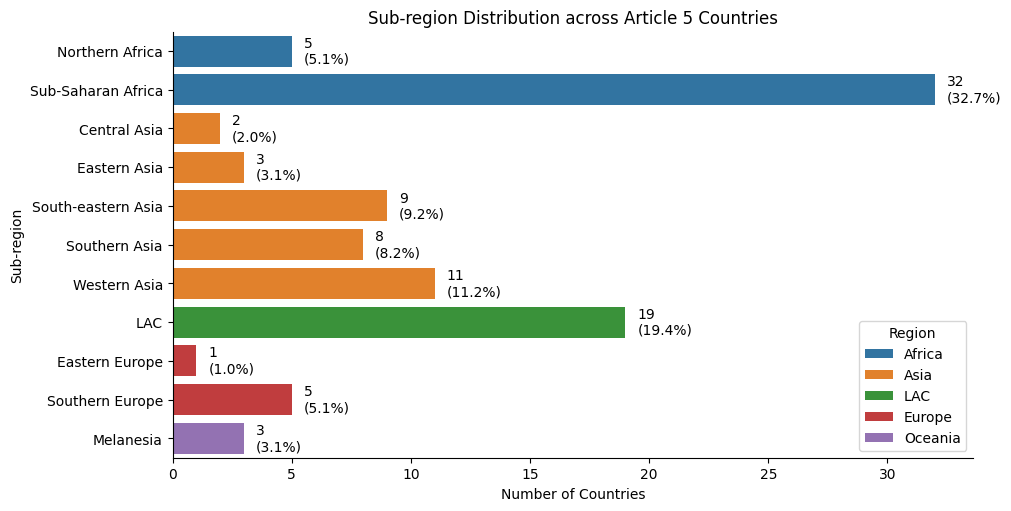

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


# Clean sub-region names
df_art5_complete["Sub-region Name"] = df_art5_complete["Sub-region Name"].str.strip()

# Define and apply region mapping
region_mapping = {
    'Sub-Saharan Africa': 'Africa', 'Northern Africa': 'Africa','Central Asia': 'Asia', 'Western Asia': 'Asia','South-eastern Asia': 'Asia',
    'Southern Asia': 'Asia', 'Eastern Asia': 'Asia', 'Eastern Europe': 'Europe','Southern Europe': 'Europe', 'Latin America and the Caribbean': 'LAC',
    'Oceania': 'Oceania', 'Melanesia': 'Oceania',
}

df_art5_complete["Region"] = df_art5_complete["Sub-region Name"].map(region_mapping)

# Filter and group data
df_regions = df_art5_complete.dropna(subset=["Region", "Sub-region Name"]).copy()
region_totals = df_regions.groupby("Region").size().sort_values(ascending=False)
grouped_counts = df_regions.groupby(['Region', 'Sub-region Name']).size().reset_index(name='Count')

# Calculate percentages and label text
grouped_counts["Percent"] = (grouped_counts["Count"] / grouped_counts["Count"].sum() * 100).round(1)
grouped_counts["Label"] = grouped_counts.apply(lambda x: f"{x['Count']} ({x['Percent']}%)", axis=1)

# Set region order and sort
grouped_counts["Region"] = pd.Categorical(grouped_counts["Region"], categories=region_totals.index, ordered=True)
grouped_counts = grouped_counts.sort_values(by=["Region", "Sub-region Name"]).reset_index(drop=True)

# Update label to show count and percent on two lines
grouped_counts["Label"] = grouped_counts.apply(lambda x: f"{x['Count']}\n({x['Percent']}%)", axis=1)

# Update sub-region name for display
grouped_counts["Sub-region Name"] = grouped_counts["Sub-region Name"].replace(
    "Latin America and the Caribbean", "LAC"
)

# Replot with simplified spines and updated label
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
sns.barplot(
    data=grouped_counts,
    y='Sub-region Name',
    x='Count',
    hue='Region',
    dodge=False,
    palette='tab10',
    ax=ax
)

# Stacked labels outside the bars
for i, row in grouped_counts.iterrows():
    ax.text(row['Count'] + 0.5, i, row['Label'], va='center', ha='left', color='black')

# Remove spines for clean look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Axis labels and legend
ax.set_xlabel('Number of Countries')
ax.set_ylabel('Sub-region')
ax.set_title('Sub-region Distribution across Article 5 Countries')
ax.legend(title='Region', loc='lower right')
plt.savefig("subregion_distribution.png", dpi=300, bbox_inches='tight')
plt.show()



In [12]:
import pandas as pd

# Map dataset variable names to descriptive indicator names
indicator_labels = {
    "MEPS_2023": "MEPS",
    "RECOOL_2023": "RECOOL",
    "INC_2023": "INC",
    "RQUAL_2023": "RQUAL",
    "FIN_2023": "FIN",
    "AIPI_2023": "AIPI",
    "GDPCAPITA_2023": "GDP"
}

# Create a new DataFrame with renamed columns
summary_df = df_art5_complete[list(indicator_labels.keys())].rename(columns=indicator_labels)

# Compute summary statistics
summary_stats = summary_df.describe().T[["mean", "std", "min", "25%", "50%", "75%", "max"]].round(2)
summary_stats.columns = ["Mean", "Std. Dev.", "Min", "25th %tile", "Median", "75th %tile", "Max"]

# Display the result
summary_stats


,Mean,Std. Dev.,Min,25th %tile,Median,75th %tile,Max
MEPS,39.95,29.98,0.00,8.33,43.75,66.32,100.00
RECOOL,20.51,21.62,0.00,0.00,16.67,33.33,77.78
INC,43.10,20.99,5.00,30.00,42.50,53.33,100.00
RQUAL,-0.38,0.74,-2.07,-0.91,-0.48,0.12,2.31
FIN,33.50,32.06,0.00,0.00,33.33,50.00,100.00
AIPI,0.42,0.11,0.18,0.33,0.41,0.49,0.80
GDP,17917.21,23031.45,919.60,4090.24,10668.56,22265.17,143786.14


## Sub-Region Statistics

In [13]:
import pandas as pd

# Step 1: Map variable names to descriptive indicator labels
indicator_labels = {
    "MEPS_2023": "MEPS",
    "RECOOL_2023": "RECOOL",
    "INC_2023": "INC",
    "RQUAL_2023": "RQUAL",
    "FIN_2023": "FIN",
    "AIPI_2023": "AIPI",
    "GDPCAPITA_2023": "GDP"
}

# Step 2: Strip whitespace from sub-region names (precautionary)
df_art5_complete["Sub-region Name"] = df_art5_complete["Sub-region Name"].str.strip()

# Step 3: Compute summary stats per sub-region
subregion_stats = df_art5_complete.groupby("Sub-region Name")[list(indicator_labels.keys())].agg(
    ["mean", "std", "min", "median", "max"]
).round(2)

# Step 4: Rename the columns using descriptive indicator names
subregion_stats.columns = [
    f"{indicator_labels[var]} - {stat.capitalize()}" for var, stat in subregion_stats.columns
]

# Step 5: Display the result
subregion_stats

,MEPS - Mean,MEPS - Std,MEPS - Min,MEPS - Median,MEPS - Max,RECOOL - Mean,RECOOL - Std,RECOOL - Min,RECOOL - Median,RECOOL - Max,...,AIPI - Mean,AIPI - Std,AIPI - Min,AIPI - Median,AIPI - Max,GDP - Mean,GDP - Std,GDP - Min,GDP - Median,GDP - Max
Sub-region Name,,,,,,,,,,,,,,,,,,,,,
Central Asia,0.00,0.00,0.00,0.00,0.00,19.44,11.79,11.11,19.44,27.78,...,0.43,0.00,0.43,0.43,0.43,13563.51,8860.64,7298.09,13563.51,19828.92
Eastern Asia,57.87,51.82,0.00,73.61,100.00,27.78,20.03,11.11,22.22,50.00,...,0.62,0.12,0.48,0.64,0.73,31795.98,18034.19,18004.85,25179.12,52203.97
Eastern Europe,83.33,NaN,83.33,83.33,83.33,33.33,NaN,33.33,33.33,33.33,...,0.48,NaN,0.48,0.48,0.48,17746.94,NaN,17746.94,17746.94,17746.94
Latin America and the Caribbean,39.91,33.11,0.00,30.56,100.00,15.20,19.23,0.00,0.00,55.56,...,0.45,0.08,0.27,0.47,0.59,19796.77,10141.25,3281.21,17564.49,39803.32
Melanesia,28.24,27.79,0.00,29.17,55.56,3.70,6.42,0.00,0.00,11.11,...,0.29,0.00,0.29,0.29,0.29,3643.20,946.76,2800.82,3460.93,4667.84
Northern Africa,54.17,10.44,43.06,52.78,70.83,27.78,25.46,0.00,27.78,66.67,...,0.41,0.04,0.37,0.41,0.47,12324.48,6437.74,2420.66,14009.52,18524.84
South-eastern Asia,47.53,33.39,0.00,65.28,79.17,17.28,16.06,0.00,11.11,44.44,...,0.50,0.15,0.33,0.50,0.80,29759.24,43795.84,5953.36,15033.88,143786.14
Southern Asia,50.35,33.99,0.00,57.64,90.28,20.69,27.69,0.00,5.56,71.11,...,0.40,0.04,0.35,0.39,0.49,11244.43,7385.47,2201.72,9735.64,24735.08
Southern Europe,46.39,8.54,33.33,50.00,55.56,51.11,20.18,33.33,44.44,77.78,...,0.50,0.04,0.43,0.50,0.54,25499.15,4020.68,21259.80,24386.61,30596.60


In [14]:
import pandas as pd

# Step 1: Map variable names to descriptive indicator labels
indicator_labels = {
    "MEPS_2023": "MEPS",
    "RECOOL_2023": "RECOOL",
    "INC_2023": "INC",
    "RQUAL_2023": "RQUAL",
    "FIN_2023": "FIN",
    "AIPI_2023": "AIPI",
    "GDPCAPITA_2023": "GDP"
}

# Step 2: Region mapping
region_mapping = {
    'Sub-Saharan Africa': 'Africa', 'Northern Africa': 'Africa',
    'Central Asia': 'Asia', 'Western Asia': 'Asia',
    'South-eastern Asia': 'Asia', 'Southern Asia': 'Asia',
    'Eastern Asia': 'Asia',
    'Eastern Europe': 'Europe', 'Southern Europe': 'Europe',
    'Latin America and the Caribbean': 'LAC',
    'Oceania': 'Oceania', 'Melanesia': 'Oceania',
}

# Step 3: Strip whitespace and map regions
df_art5_complete["Sub-region Name"] = df_art5_complete["Sub-region Name"].str.strip()
df_art5_complete["Region"] = df_art5_complete["Sub-region Name"].map(region_mapping)

# Step 4: Compute subregional summary stats
subregion_stats = df_art5_complete.groupby("Sub-region Name")[list(indicator_labels.keys())].agg(
    ["mean", "std", "min", "median", "max"]
).round(2)

# Rename columns using descriptive labels
subregion_stats.columns = [
    f"{indicator_labels[var]} - {stat.capitalize()}" for var, stat in subregion_stats.columns
]

# Step 5: Add Region column to subregional table
subregion_stats["Region"] = subregion_stats.index.map(region_mapping)

# Step 6: Compute regional mean rows
region_means = df_art5_complete.groupby("Region")[list(indicator_labels.keys())].mean().round(2)
region_means.index = [f"REGION: {r}" for r in region_means.index]

# Rename columns to match subregion_stats
region_means.columns = [f"{indicator_labels[col]} - Mean" for col in region_means.columns]
region_means["Region"] = [r.replace("REGION: ", "") for r in region_means.index]

# Step 7: Combine tables
subregion_stats_with_region = pd.concat([subregion_stats, region_means], axis=0)
subregion_stats_with_region = subregion_stats_with_region.sort_values("Region")

# Final table
subregion_stats_with_region


,MEPS - Mean,MEPS - Std,MEPS - Min,MEPS - Median,MEPS - Max,RECOOL - Mean,RECOOL - Std,RECOOL - Min,RECOOL - Median,RECOOL - Max,...,AIPI - Std,AIPI - Min,AIPI - Median,AIPI - Max,GDP - Mean,GDP - Std,GDP - Min,GDP - Median,GDP - Max,Region
Northern Africa,54.17,10.44,43.06,52.78,70.83,27.78,25.46,0.00,27.78,66.67,...,0.04,0.37,0.41,0.47,12324.48,6437.74,2420.66,14009.52,18524.84,Africa
Sub-Saharan Africa,31.03,28.05,0.00,33.33,76.39,16.15,20.52,0.00,8.33,77.78,...,0.07,0.18,0.32,0.50,4190.28,2856.72,919.60,3385.40,15194.20,Africa
REGION: Africa,34.16,NaN,NaN,NaN,NaN,17.72,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5289.50,NaN,NaN,NaN,NaN,Africa
Central Asia,0.00,0.00,0.00,0.00,0.00,19.44,11.79,11.11,19.44,27.78,...,0.00,0.43,0.43,0.43,13563.51,8860.64,7298.09,13563.51,19828.92,Asia
Eastern Asia,57.87,51.82,0.00,73.61,100.00,27.78,20.03,11.11,22.22,50.00,...,0.12,0.48,0.64,0.73,31795.98,18034.19,18004.85,25179.12,52203.97,Asia
South-eastern Asia,47.53,33.39,0.00,65.28,79.17,17.28,16.06,0.00,11.11,44.44,...,0.15,0.33,0.50,0.80,29759.24,43795.84,5953.36,15033.88,143786.14,Asia
Southern Asia,50.35,33.99,0.00,57.64,90.28,20.69,27.69,0.00,5.56,71.11,...,0.04,0.35,0.39,0.49,11244.43,7385.47,2201.72,9735.64,24735.08,Asia
Western Asia,44.44,25.69,12.50,45.83,81.94,29.29,21.81,0.00,33.33,77.78,...,0.06,0.42,0.53,0.63,49778.21,34798.33,10411.84,42326.16,128918.55,Asia
REGION: Asia,45.24,NaN,NaN,NaN,NaN,23.20,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31147.39,NaN,NaN,NaN,NaN,Asia
Eastern Europe,83.33,NaN,83.33,83.33,83.33,33.33,NaN,33.33,33.33,33.33,...,NaN,0.48,0.48,0.48,17746.94,NaN,17746.94,17746.94,17746.94,Europe


In [15]:
subregion_stats_with_region.to_excel("subregion_summary_statistics.xlsx")


### Energy Efficiency

/home/jovyan/.local/lib/python3.11/site-packages/pandas/core/arrays/categorical.py:596: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


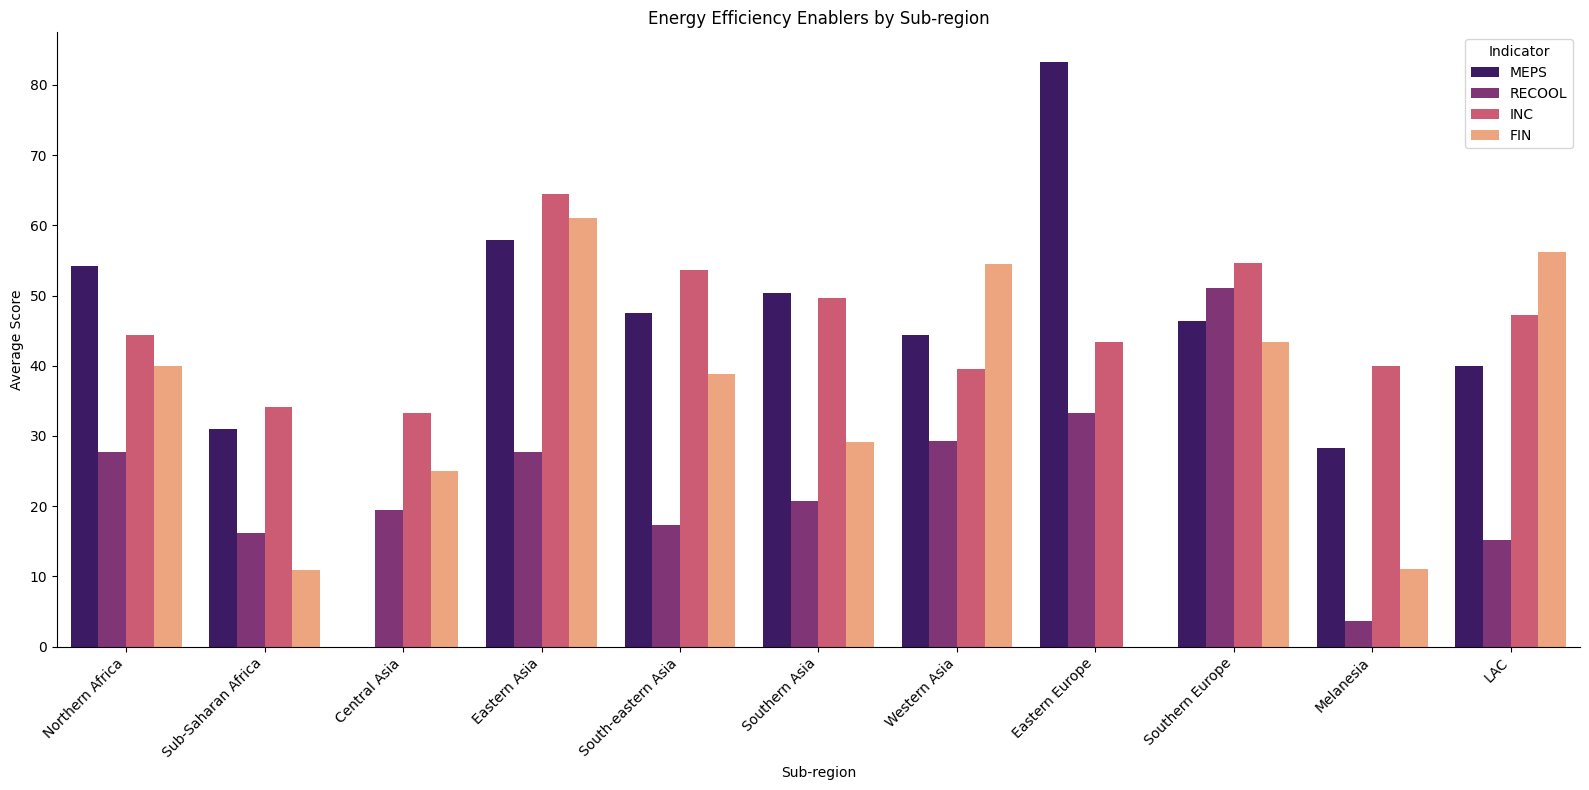

In [16]:
# Recreate subregion_means if not already defined
subregion_means = df_art5_complete.groupby("Sub-region Name")[[
    "MEPS_2023", "RECOOL_2023", "INC_2023", "FIN_2023", "RQUAL_2023", "AIPI_2023", "GDPCAPITA_2023"
]].mean().round(2)

# Map short labels
indicator_labels = {
    "MEPS_2023": "MEPS",
    "RECOOL_2023": "RECOOL",
    "INC_2023": "INC",
    "FIN_2023": "FIN",
    "RQUAL_2023": "RQUAL",
    "AIPI_2023": "AIPI",
    "GDPCAPITA_2023": "GDP"
}

subregion_means.columns = [indicator_labels[col] for col in subregion_means.columns]

# Reset and reshape for plotting
subregion_means_reset = subregion_means.reset_index()
long_df = subregion_means_reset.melt(id_vars="Sub-region Name", var_name="Indicator", value_name="Mean Score")

# Define grouped indicator sets
efficiency_indicators = [
    "MEPS", 
    "RECOOL",
    "INC",
    "FIN"
]
# Define macro region order
macro_region_order = ['Africa', 'Asia', 'Europe', 'LAC', 'Oceania']

# Map each sub-region to a macro region
macro_region_map = {
    'Sub-Saharan Africa': 'Africa',
    'Northern Africa': 'Africa',
    'Western Asia': 'Asia',
    'South-eastern Asia': 'Asia',
    'Southern Asia': 'Asia',
    'Central Asia': 'Asia',
    'Eastern Asia': 'Asia',
    'Eastern Europe': 'Europe',
    'Southern Europe': 'Europe',
    'Latin America & Caribbean': 'LAC',
    'Melanesia': 'Oceania'
}

# Apply macro region mapping and define ordering
long_df["Macro Region"] = long_df["Sub-region Name"].map(macro_region_map)
long_df["Macro Region"] = pd.Categorical(long_df["Macro Region"], categories=macro_region_order, ordered=True)
long_df["Sub-region Name"] = long_df["Sub-region Name"].replace("Latin America and the Caribbean", "LAC")

# Sort sub-regions within macro regions
ordered_subregions = long_df.drop_duplicates(subset=["Sub-region Name", "Macro Region"]) \
    .sort_values(by=["Macro Region", "Sub-region Name"])["Sub-region Name"]

long_df["Sub-region Name"] = pd.Categorical(long_df["Sub-region Name"], categories=ordered_subregions, ordered=True)

# Now replot Energy Efficiency Enablers
efficiency_df = long_df[long_df["Indicator"].isin(efficiency_indicators)]


#Plot
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    data=efficiency_df,
    x="Sub-region Name",
    y="Mean Score",
    hue="Indicator",
    palette="magma"
)
# Remove spines for clean look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#More edits to the plot
plt.xticks(rotation=45, ha='right')
plt.title("Energy Efficiency Enablers by Sub-region")
plt.ylabel("Average Score")
plt.xlabel("Sub-region")
plt.legend(title="Indicator", loc='upper right')
plt.tight_layout()
plt.savefig("subregion_energyindicators.png", dpi=300, bbox_inches='tight')
plt.show()


### Regulatory Quality

/home/jovyan/.local/lib/python3.11/site-packages/pandas/core/arrays/categorical.py:596: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


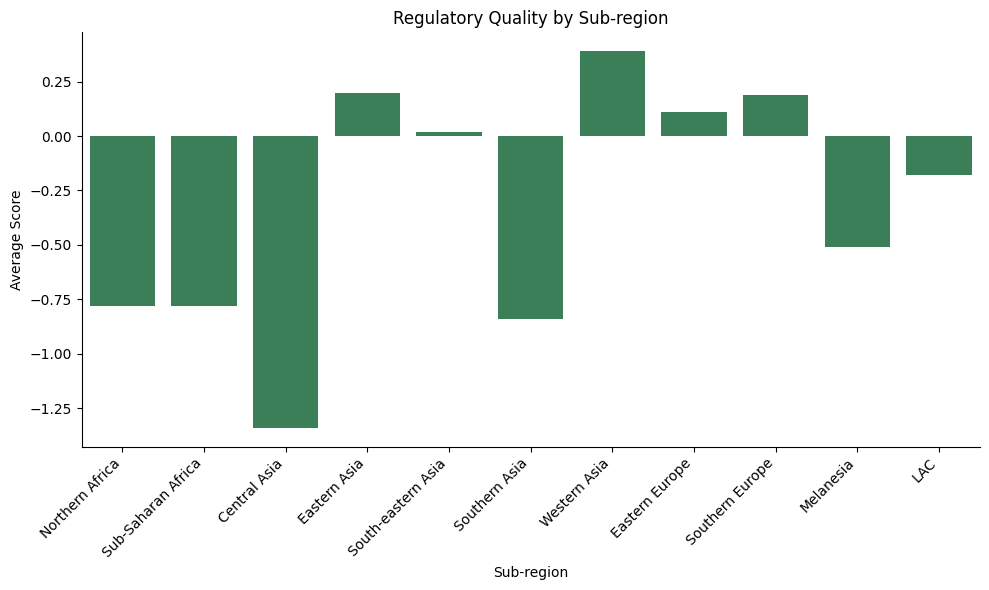

In [17]:
# Define macro region order
macro_region_order = ['Africa', 'Asia', 'Europe', 'LAC', 'Oceania']

# Map each sub-region to a macro region
macro_region_map = {
    'Sub-Saharan Africa': 'Africa',
    'Northern Africa': 'Africa',
    'Western Asia': 'Asia',
    'South-eastern Asia': 'Asia',
    'Southern Asia': 'Asia',
    'Central Asia': 'Asia',
    'Eastern Asia': 'Asia',
    'Eastern Europe': 'Europe',
    'Southern Europe': 'Europe',
    'Latin America and the Caribbean': 'LAC',
    'Melanesia': 'Oceania'
}

# Add macro region column
long_df["Macro Region"] = long_df["Sub-region Name"].map(macro_region_map)
long_df["Macro Region"] = pd.Categorical(long_df["Macro Region"], categories=macro_region_order, ordered=True)

# Rename for display
long_df["Sub-region Name"] = long_df["Sub-region Name"].replace("Latin America and the Caribbean", "LAC")

# Sort sub-regions within macro regions
ordered_subregions = long_df.drop_duplicates(subset=["Sub-region Name", "Macro Region"]) \
    .sort_values(by=["Macro Region", "Sub-region Name"])["Sub-region Name"]

# Apply categorical ordering
long_df["Sub-region Name"] = pd.Categorical(long_df["Sub-region Name"], categories=ordered_subregions, ordered=True)

regqual_df = long_df[long_df["Indicator"] == "RQUAL"]

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=regqual_df,
    x="Sub-region Name",
    y="Mean Score",
    color="seagreen"
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(rotation=45, ha='right')
plt.title("Regulatory Quality by Sub-region")
plt.ylabel("Average Score")
plt.xlabel("Sub-region")
plt.tight_layout()
plt.savefig("subregion_regqual.png", dpi=300, bbox_inches='tight')
plt.show()



### AIPI

/home/jovyan/.local/lib/python3.11/site-packages/pandas/core/arrays/categorical.py:596: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


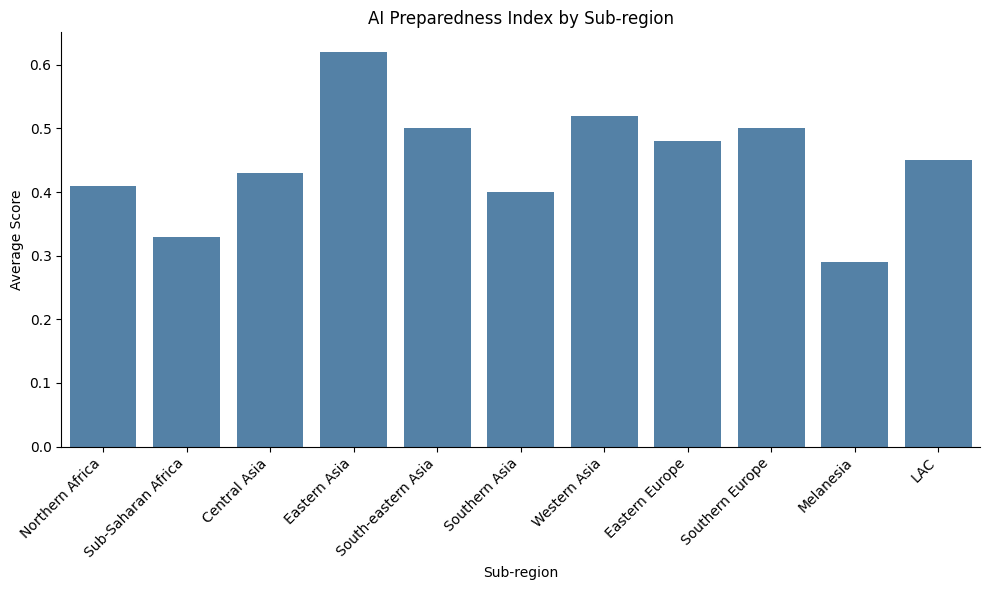

In [18]:

# AI Preparedness Index plot
aipi_df = long_df[long_df["Indicator"] == "AIPI"]

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=aipi_df,
    x="Sub-region Name",
    y="Mean Score",
    color="steelblue"
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=45, ha='right')
plt.title("AI Preparedness Index by Sub-region")
plt.ylabel("Average Score")
plt.xlabel("Sub-region")
plt.tight_layout()
plt.savefig("subregion_aipi.png", dpi=300, bbox_inches='tight')
plt.show()


# VIF and Correlation 

## Raw

In [19]:
!pip install numpy==1.24 --force-reinstall --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 9.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyclustertend 1.9.0 requires pytest<9.0.0,>=8.3.4, which is not installed.
pyclustertend 1.9.0 requires numba<0.61.0,>=0.60.0, but you have numba 0.57.1 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.0 which is incompatible.
seaborn 0.13.2 requires numpy!=1.24.0,>=1.20, but you have numpy 1.24.0 which is incompatible.


The Hopkins score is well below the 0.5 threshold, indicating that the data is more uniform and there are no clear clusters. To handle this issue, I proceed to run a PCA combining all energy-related indicators, under the theoretical assumption that these demonstrate commitment to sustainable energy, which is directly related to sustainable cooling. Furthermore, incentives for utility companies indicate a foundation is being developed for specific performance-based models, which enable servitization. 

Source: https://www.datanovia.com/en/lessons/assessing-clustering-tendency/#:~:text=The%20Hopkins%20statistic%20(Lawson%20and,spatial%20randomness%20of%20the%20data.

The PCA captures approximately 54% of the variance of these variables, meaning it succesfully summarises a shared pattern across energy and financial policy support.
In social science, variance above 50% is considered acceptable.
Source: https://stats.oarc.ucla.edu/spss/seminars/efa-spss/#:~:text=Some%20criteria%20say%20that%20the,only%2050%25%20to%2060%25.

In [20]:
from pyclustertend import hopkins
from sklearn.preprocessing import StandardScaler

# Prepare the reduced dataset for clustering
X_reduced = df_art5_complete[["MEPS_2023", "RECOOL_2023", "INC_2023","FIN_2023", "RQUAL_2023", "AIPI_2023", "log_GDPCAPITA_2023"]]

# Standardise the features
scaler = StandardScaler()
X_reduced_scaled = scaler.fit_transform(X_reduced)

# Compute the Hopkins statistic
hopkins_score_reduced = hopkins(X_reduced_scaled, X_reduced_scaled.shape[0])
print(f"Hopkins statistic: {hopkins_score_reduced}")



Hopkins statistic: 0.33230547616495704


In [21]:
df_art5_complete.head()

,CTY_CODE,COUNTRY,Sub-region Name,ART5,MEPS_2023,KIG_2023,ELEP_2023,RECOOL_2023,INC_2023,RQUAL_2023,...,GDPCAPITA_2023,GDP_2023,TOTALHIGH_2023,RURAL_HIGHRISK_2023,URBA_HIGHRISK_2023,MEDIUMRISK_2023,LOWRISK_2023,MEDLOWRISK_2023,log_GDPCAPITA_2023,Region
0,AFG,Afghanistan,Southern Asia,ART 5,0.000000,NaN,50.476190,0.000000,20.000000,-1.266425,...,2201.722907,17152.234637,1.252442,0.000000e+00,1.252442e+06,0.000000e+00,0.000000e+00,0.000000e+00,7.697450,Asia
1,AGO,Angola,Sub-Saharan Africa,ART 5,0.000000,Ratification,81.904762,0.000000,20.000000,-0.761388,...,8046.817299,84875.162197,25.783735,5.458703e+06,2.032503e+07,6.379564e+06,2.619504e+06,8.999068e+06,8.993156,Africa
2,ALB,Albania,Southern Europe,ART 5,55.555556,Ratification,NaN,33.333333,33.333333,0.171954,...,21259.797781,23547.180412,NaN,NaN,NaN,NaN,NaN,NaN,9.964620,Europe
3,ARE,United Arab Emirates,Western Asia,ART 5,66.666667,NaN,NaN,33.333333,56.666667,1.042391,...,76110.384842,514130.432648,NaN,NaN,NaN,NaN,NaN,NaN,11.239953,Asia
4,ARG,Argentina,Latin America and the Caribbean,ART 5,0.000000,Ratification,NaN,0.000000,40.000000,-0.482535,...,30082.304525,646075.277525,5.252488,1.344895e+05,5.117998e+06,5.757169e+06,1.387371e+07,1.963088e+07,10.311726,LAC


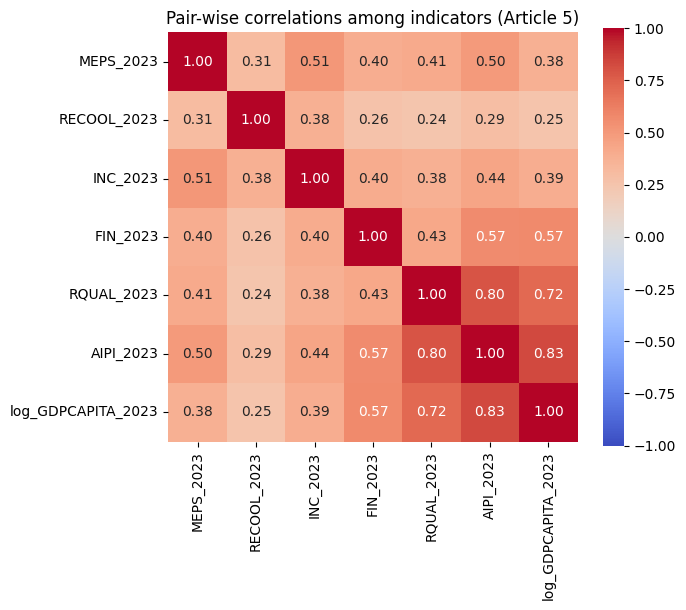

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns


# Pair-wise correlation heat-map
new_vars_2 = ["MEPS_2023", "RECOOL_2023", "INC_2023","FIN_2023", "RQUAL_2023", "AIPI_2023", "log_GDPCAPITA_2023"]

X0 = df_art5_complete[new_vars_2]
corr = X0.corr()

plt.figure(figsize=(7, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1,
            fmt=".2f", square=True)
plt.title("Pair-wise correlations among indicators (Article 5)")
plt.tight_layout()
plt.show()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extract and standardise the data
X_vif = df_art5_complete[new_vars_2]
scaler = StandardScaler()
X_vif_scaled = pd.DataFrame(scaler.fit_transform(X_vif), columns=new_vars_2)

# Calculate VIF for each variable
vif_data = pd.DataFrame({
    "Variable": X_vif_scaled.columns,
    "VIF": [variance_inflation_factor(X_vif_scaled.values, i) for i in range(X_vif_scaled.shape[1])]
}).sort_values(by="VIF", ascending=False)

# Display the result
# Style the VIF table with a caption
vif_data_styled = vif_data.style.set_caption("VIF for Clustering Variables")

# Display the styled table
vif_data_styled

,Variable,VIF
5,AIPI_2023,4.930684
6,log_GDPCAPITA_2023,3.538809
4,RQUAL_2023,2.849127
3,FIN_2023,1.658852
0,MEPS_2023,1.593424
2,INC_2023,1.564444
1,RECOOL_2023,1.208158


## Elbow Test and DB Score

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7faaaf522fc0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/opt/conda/lib/python3.11/site-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


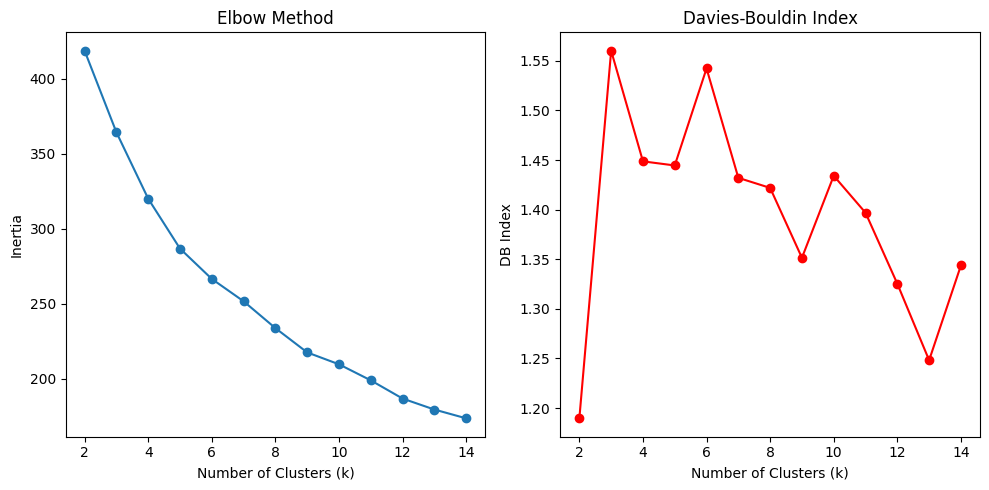

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

new_vars = ["MEPS_2023", "RECOOL_2023", "INC_2023", "FIN_2023", "RQUAL_2023", "AIPI_2023", "log_GDPCAPITA_2023"]

# "MEPS_2023", "RECOOL_2023", "INC_2023", "FIN_2023",
#"PC1_Energy"


# Standardise the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_art5_complete[new_vars])

# Initialise metrics
inertia = []
db_scores = []
k_range = range(2, 15)

# Loop through each k to compute KMeans and DBI
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    db_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))

# Plot Elbow and DB Index
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, db_scores, marker='o', color='red')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('DB Index')

plt.tight_layout()
plt.show()


# K-Means

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

final_vars_2 = new_vars_2

# Standardise the data
scaler = StandardScaler()
X_kmeans_scaled_PC = scaler.fit_transform(df_art5_complete[final_vars_2])

# KMeans
kmeans_PC = KMeans(n_clusters=9, random_state=42, n_init=10)
df_kmeans_PC = df_art5_complete.copy().reset_index(drop=True)
df_kmeans_PC["Cluster"] = kmeans_PC.fit_predict(X_kmeans_scaled_PC)

# Create summary with TOTALHIGH_2023 included
cluster_summary_PC = df_kmeans_PC.groupby("Cluster").agg(
    Total_Countries=("COUNTRY", "count"),
    **{col: (col, "mean") for col in final_vars_2},
    TOTALHIGH_2023=("TOTALHIGH_2023", "mean"),
    GDPCAPITA_2023=("GDPCAPITA_2023", "mean")
).round(2)

# Reorder columns so TOTALHIGH_2023 comes last
cols = [col for col in cluster_summary_PC.columns if col != "TOTALHIGH_2023"] + ["TOTALHIGH_2023"]
cluster_summary_PC = cluster_summary_PC[cols]

# Calculate overall mean row in same order
overall_means_PC = df_kmeans_PC[cols[1:]].mean().round(2)
overall_row_PC = pd.Series(
    [len(df_kmeans_PC)] + overall_means_PC.tolist(),
    index=cluster_summary_PC.columns,
    name="Overall Mean"
)

# Combine into final table
cluster_summary_PC_with_refs = pd.concat([
    cluster_summary_PC,
    overall_row_PC.to_frame().T
])

cluster_summary_PC_with_refs


,Total_Countries,MEPS_2023,RECOOL_2023,INC_2023,FIN_2023,RQUAL_2023,AIPI_2023,log_GDPCAPITA_2023,GDPCAPITA_2023,TOTALHIGH_2023
0,9.0,69.91,30.86,69.26,87.04,-0.05,0.51,9.94,22797.34,28.62
1,26.0,15.97,6.41,23.33,5.13,-1.02,0.32,8.03,3963.81,9.12
2,13.0,27.35,12.39,38.21,47.44,-0.80,0.36,8.95,8345.33,17.15
3,7.0,75.79,21.43,48.57,71.43,0.83,0.60,10.88,60870.11,NaN
4,14.0,46.23,51.51,51.21,47.62,0.03,0.50,9.92,21702.24,68.75
5,6.0,62.73,50.93,60.00,11.11,-0.92,0.32,8.50,6304.83,6.78
6,11.0,19.32,8.08,31.21,28.79,0.09,0.47,10.13,29086.95,5.19
7,11.0,60.86,11.62,57.88,13.64,-0.33,0.41,9.03,9788.00,10.90
8,1.0,79.17,11.11,100.00,50.00,2.31,0.80,11.88,143786.14,NaN
Overall Mean,98.0,39.95,20.51,43.10,33.50,-0.38,0.42,9.22,17917.21,17.29


In [26]:
# Group and display countries by cluster for the KMeans result in df_kmeans_PC
clusters_PC = df_kmeans_PC.groupby("Cluster")["COUNTRY"].apply(list)

# Convert to dictionary for easier viewing
clusters_PC_dict = clusters_PC.to_dict()

clusters_PC_dict

{0: ['Brazil',
  'China',
  'Ecuador',
  'Jordan',
  'Morocco',
  'Mexico',
  'Panama',
  'Thailand',
  'Uruguay'],
 1: ['Afghanistan',
  'Angola',
  'Burundi',
  'Benin',
  'Burkina Faso',
  'Central African Republic',
  'Congo, Dem. Rep.',
  'Congo',
  'Ethiopia',
  'Guinea',
  'Honduras',
  'Haiti',
  'Liberia',
  'Madagascar',
  'Myanmar',
  'Mozambique',
  'Malawi',
  'Niger',
  'Nepal',
  'Sudan',
  'Solomon Islands',
  'Sierra Leone',
  'Somalia',
  'Turkmenistan',
  'Tanzania',
  'Uganda'],
 2: ['Bangladesh',
  'Bolivia',
  "Côte d'Ivoire",
  'Cameroon',
  'Algeria',
  'Kyrgyz Republic',
  'Cambodia',
  'Lao PDR',
  'Lebanon',
  'Mali',
  'Nigeria',
  'Nicaragua',
  'Papua New Guinea'],
 3: ['United Arab Emirates',
  'Chile',
  'Costa Rica',
  'Republic of Korea',
  'Malaysia',
  'Qatar',
  'Saudi Arabia'],
 4: ['Albania',
  'Armenia',
  'Bosnia and Herzegovina',
  'Georgia',
  'Indonesia',
  'India',
  'Sri Lanka',
  'North Macedonia',
  'Montenegro',
  'Mongolia',
  'Serbia',

## Distribution of Clusters by Sub-Region

<Figure size 1200x600 with 0 Axes>

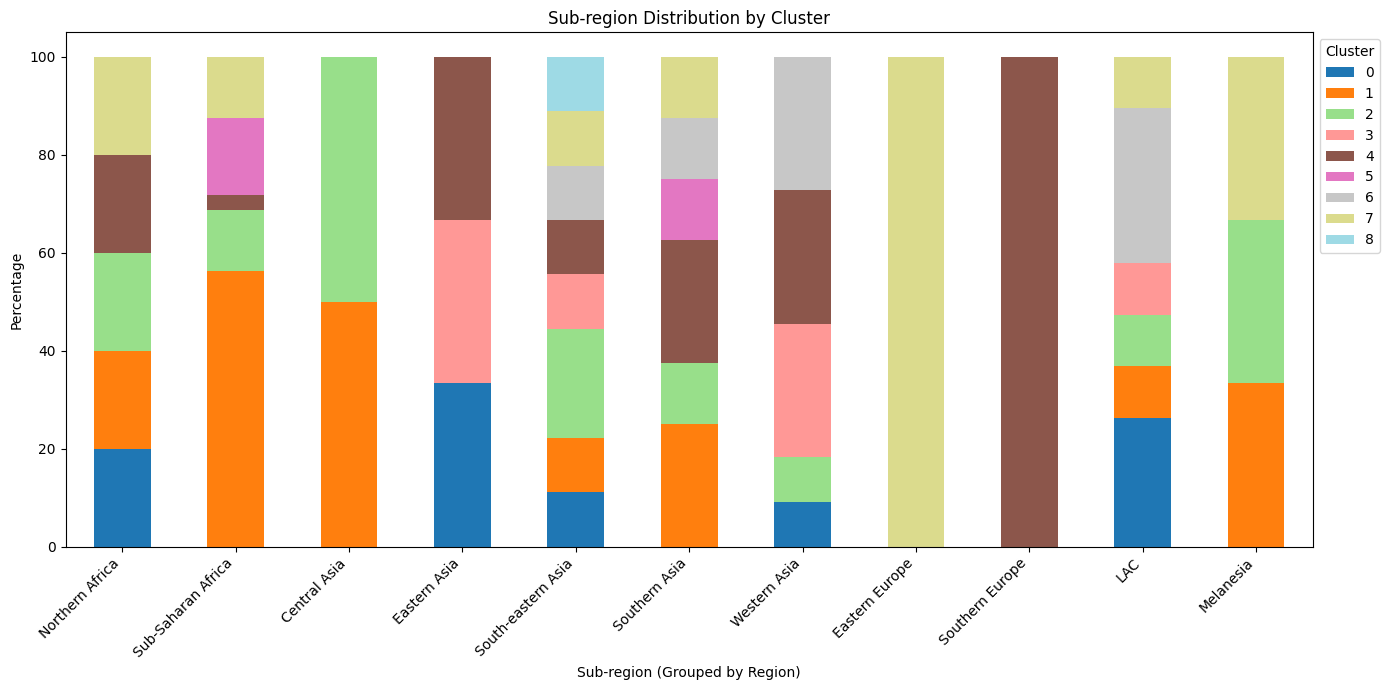

In [27]:
# Create a mapping of sub-regions to broader regions
region_map = {
    'Eastern Africa': 'Africa', 'Middle Africa': 'Africa', 'Northern Africa': 'Africa',
    'Southern Africa': 'Africa', 'Western Africa': 'Africa', 'Sub-Saharan Africa':'Africa', 
    'Central Asia': 'Asia', 'Eastern Asia': 'Asia', 'South-eastern Asia': 'Asia',
    'Southern Asia': 'Asia', 'Western Asia': 'Asia',
    'Caribbean': 'Americas', 'Central America': 'Americas', 'South America': 'Americas',
    'Northern America': 'Americas', 'Latin America and the Caribbean':"LAC",
    'Eastern Europe': 'Europe', 'Northern Europe': 'Europe', 'Southern Europe': 'Europe',
    'Western Europe': 'Europe',
    'Australia and New Zealand': 'Oceania', 'Melanesia': 'Oceania', 'Micronesia': 'Oceania', 'Polynesia': 'Oceania'
}
# Count countries per cluster per sub-region
subregion_cluster_counts = df_kmeans_PC.groupby(['Sub-region Name', 'Cluster']).size().unstack(fill_value=0)

# Convert to percentage distribution
subregion_percent = subregion_cluster_counts.div(subregion_cluster_counts.sum(axis=1), axis=0).T * 100
# Re-check subregion_order_df and ensure sorting groups sub-regions by region and then by sub-region
subregion_order_df = pd.DataFrame({'Sub-region': subregion_percent.columns})
subregion_order_df['Region'] = subregion_order_df['Sub-region'].map(region_map)

# Sort by region first, then sub-region within region
subregion_order_df = subregion_order_df.sort_values(by=['Region', 'Sub-region'], ascending=[True, True])
sorted_subregions = subregion_order_df['Sub-region'].tolist()

# Reorder columns in the data
subregion_percent_sorted = subregion_percent[sorted_subregions]
subregion_percent_sorted = subregion_percent_sorted.rename(columns={
    "Latin America and the Caribbean": "LAC"
})

# Plot stacked bar chart with correctly grouped sub-regions
plt.figure(figsize=(12, 6))
subregion_percent_sorted.T.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title("Sub-region Distribution by Cluster")
plt.ylabel("Percentage")
plt.xlabel("Sub-region (Grouped by Region)")
plt.legend(title="Cluster", loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("cluster_regiondistrubtion", dpi=300, bbox_inches='tight')
plt.show()


In [28]:
! pip install squarify

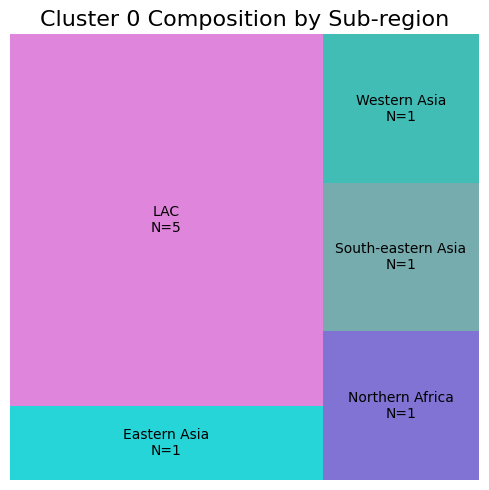

In [29]:
import squarify

# Define sub-region colours
subregion_colours = {
    'Northern Africa': 'slateblue',
    'Sub-Saharan Africa': 'darkslateblue',
    'Central Asia': 'teal',
    'Eastern Asia': 'darkturquoise',
    'South-eastern Asia': 'cadetblue',
    'Southern Asia': 'powderblue',
    'Western Asia': 'lightseagreen',
    'Eastern Europe': 'lightcoral',
    'Southern Europe': 'indianred',
    'LAC': 'orchid',
    'Melanesia': 'mediumvioletred'
}

# Replace sub-region name for consistency
df_kmeans_PC['Sub-region Name'] = df_kmeans_PC['Sub-region Name'].replace({
    'Latin America and the Caribbean': 'LAC'
})

# Filter Cluster 0
cluster_0 = df_kmeans_PC[df_kmeans_PC['Cluster'] == 0].copy()

# Group by sub-region and count countries
subregion_grouped = cluster_0.groupby('Sub-region Name')['COUNTRY'].apply(list)
cluster0_subregion_counts = subregion_grouped.apply(len)

# Build labels: just Sub-region and N=
labels = [
    f"{subregion}\nN={count}"
    for subregion, count in zip(subregion_grouped.index, cluster0_subregion_counts.values)
]

# Get colours per sub-region
colour_list = [
    subregion_colours[subregion]
    for subregion in subregion_grouped.index
]

# Plot
sizes = cluster0_subregion_counts.values

plt.figure(figsize=(5, 5))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colour_list,
    alpha=0.85,
    text_kwargs={'fontsize': 10, 'color': 'black'}
)
plt.title('Cluster 0 Composition by Sub-region', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


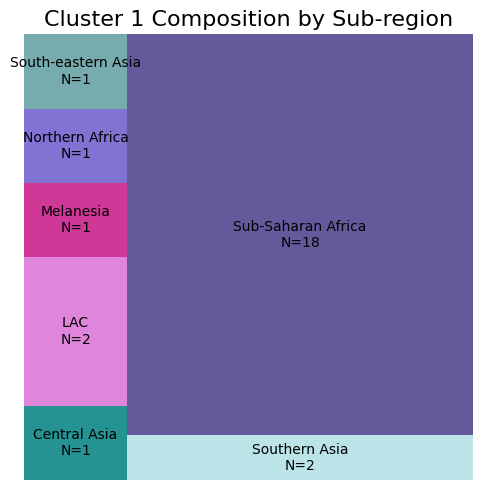

In [30]:

# Define sub-region colours
subregion_colours = {
    'Northern Africa': 'slateblue',
    'Sub-Saharan Africa': 'darkslateblue',
    'Central Asia': 'teal',
    'Eastern Asia': 'darkturquoise',
    'South-eastern Asia': 'cadetblue',
    'Southern Asia': 'powderblue',
    'Western Asia': 'lightseagreen',
    'Eastern Europe': 'lightcoral',
    'Southern Europe': 'indianred',
    'LAC': 'orchid',
    'Melanesia': 'mediumvioletred'
}

# Replace sub-region name for consistency
df_kmeans_PC['Sub-region Name'] = df_kmeans_PC['Sub-region Name'].replace({
    'Latin America and the Caribbean': 'LAC'
})

# Filter Cluster 0
cluster_1 = df_kmeans_PC[df_kmeans_PC['Cluster'] == 1].copy()

# Group by sub-region and count countries
subregion_grouped = cluster_1.groupby('Sub-region Name')['COUNTRY'].apply(list)
cluster1_subregion_counts = subregion_grouped.apply(len)

# Build labels: just Sub-region and N=
labels = [
    f"{subregion}\nN={count}"
    for subregion, count in zip(subregion_grouped.index, cluster1_subregion_counts.values)
]

# Get colours per sub-region
colour_list = [
    subregion_colours[subregion]
    for subregion in subregion_grouped.index
]

# Plot
sizes = cluster1_subregion_counts.values

plt.figure(figsize=(5, 5))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colour_list,
    alpha=0.85,
    text_kwargs={'fontsize': 10, 'color': 'black'}
)
plt.title('Cluster 1 Composition by Sub-region', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


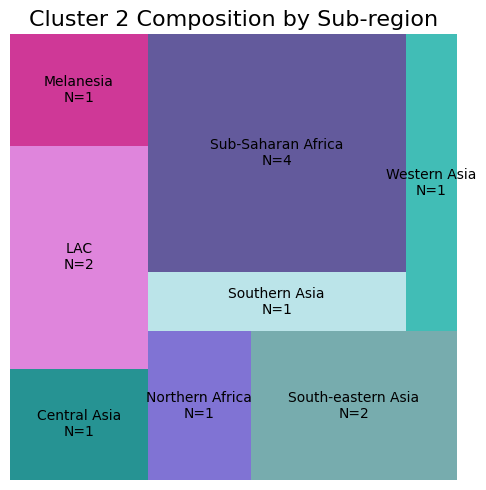

In [31]:

# Define sub-region colours
subregion_colours = {
    'Northern Africa': 'slateblue',
    'Sub-Saharan Africa': 'darkslateblue',
    'Central Asia': 'teal',
    'Eastern Asia': 'darkturquoise',
    'South-eastern Asia': 'cadetblue',
    'Southern Asia': 'powderblue',
    'Western Asia': 'lightseagreen',
    'Eastern Europe': 'lightcoral',
    'Southern Europe': 'indianred',
    'LAC': 'orchid',
    'Melanesia': 'mediumvioletred'
}

# Replace sub-region name for consistency
df_kmeans_PC['Sub-region Name'] = df_kmeans_PC['Sub-region Name'].replace({
    'Latin America and the Caribbean': 'LAC'
})

# Filter Cluster 2
cluster_2 = df_kmeans_PC[df_kmeans_PC['Cluster'] == 2].copy()

# Group by sub-region and count countries
subregion_grouped = cluster_2.groupby('Sub-region Name')['COUNTRY'].apply(list)
cluster2_subregion_counts = subregion_grouped.apply(len)

# Build labels: just Sub-region and N=
labels = [
    f"{subregion}\nN={count}"
    for subregion, count in zip(subregion_grouped.index, cluster2_subregion_counts.values)
]

# Get colours per sub-region
colour_list = [
    subregion_colours[subregion]
    for subregion in subregion_grouped.index
]

# Plot
sizes = cluster2_subregion_counts.values

plt.figure(figsize=(5, 5))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colour_list,
    alpha=0.85,
    text_kwargs={'fontsize': 10, 'color': 'black'}
)
plt.title('Cluster 2 Composition by Sub-region', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


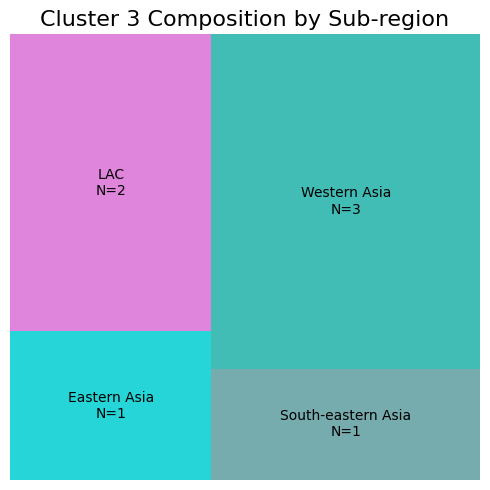

In [32]:

# Define sub-region colours
subregion_colours = {
    'Northern Africa': 'slateblue',
    'Sub-Saharan Africa': 'darkslateblue',
    'Central Asia': 'teal',
    'Eastern Asia': 'darkturquoise',
    'South-eastern Asia': 'cadetblue',
    'Southern Asia': 'powderblue',
    'Western Asia': 'lightseagreen',
    'Eastern Europe': 'lightcoral',
    'Southern Europe': 'indianred',
    'LAC': 'orchid',
    'Melanesia': 'mediumvioletred'
}

# Replace sub-region name for consistency
df_kmeans_PC['Sub-region Name'] = df_kmeans_PC['Sub-region Name'].replace({
    'Latin America and the Caribbean': 'LAC'
})

# Filter Cluster 3
cluster_3 = df_kmeans_PC[df_kmeans_PC['Cluster'] == 3].copy()

# Group by sub-region and count countries
subregion_grouped = cluster_3.groupby('Sub-region Name')['COUNTRY'].apply(list)
cluster3_subregion_counts = subregion_grouped.apply(len)

# Build labels: just Sub-region and N=
labels = [
    f"{subregion}\nN={count}"
    for subregion, count in zip(subregion_grouped.index, cluster3_subregion_counts.values)
]

# Get colours per sub-region
colour_list = [
    subregion_colours[subregion]
    for subregion in subregion_grouped.index
]

# Plot
sizes = cluster3_subregion_counts.values

plt.figure(figsize=(5, 5))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colour_list,
    alpha=0.85,
    text_kwargs={'fontsize': 10, 'color': 'black'}
)
plt.title('Cluster 3 Composition by Sub-region', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


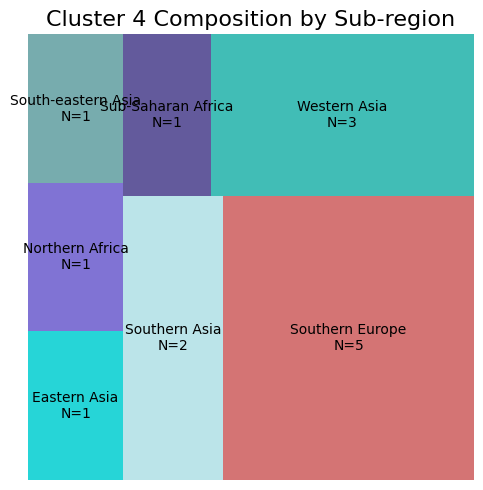

In [33]:

# Define sub-region colours
subregion_colours = {
    'Northern Africa': 'slateblue',
    'Sub-Saharan Africa': 'darkslateblue',
    'Central Asia': 'teal',
    'Eastern Asia': 'darkturquoise',
    'South-eastern Asia': 'cadetblue',
    'Southern Asia': 'powderblue',
    'Western Asia': 'lightseagreen',
    'Eastern Europe': 'lightcoral',
    'Southern Europe': 'indianred',
    'LAC': 'orchid',
    'Melanesia': 'mediumvioletred'
}

# Replace sub-region name for consistency
df_kmeans_PC['Sub-region Name'] = df_kmeans_PC['Sub-region Name'].replace({
    'Latin America and the Caribbean': 'LAC'
})

# Filter Cluster 4
cluster_4 = df_kmeans_PC[df_kmeans_PC['Cluster'] == 4].copy()

# Group by sub-region and count countries
subregion_grouped = cluster_4.groupby('Sub-region Name')['COUNTRY'].apply(list)
cluster4_subregion_counts = subregion_grouped.apply(len)

# Build labels: just Sub-region and N=
labels = [
    f"{subregion}\nN={count}"
    for subregion, count in zip(subregion_grouped.index, cluster4_subregion_counts.values)
]

# Get colours per sub-region
colour_list = [
    subregion_colours[subregion]
    for subregion in subregion_grouped.index
]

# Plot
sizes = cluster4_subregion_counts.values

plt.figure(figsize=(5, 5))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colour_list,
    alpha=0.85,
    text_kwargs={'fontsize': 10, 'color': 'black'}
)
plt.title('Cluster 4 Composition by Sub-region', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


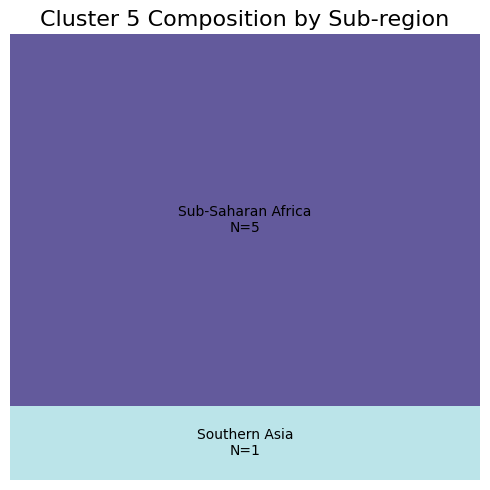

In [34]:

# Define sub-region colours

subregion_colours = {
    'Northern Africa': 'slateblue',
    'Sub-Saharan Africa': 'darkslateblue',
    'Central Asia': 'teal',
    'Eastern Asia': 'darkturquoise',
    'South-eastern Asia': 'cadetblue',
    'Southern Asia': 'powderblue',
    'Western Asia': 'lightseagreen',
    'Eastern Europe': 'lightcoral',
    'Southern Europe': 'indianred',
    'LAC': 'orchid',
    'Melanesia': 'mediumvioletred'
}

# Replace sub-region name for consistency
df_kmeans_PC['Sub-region Name'] = df_kmeans_PC['Sub-region Name'].replace({
    'Latin America and the Caribbean': 'LAC'
})

# Filter Cluster 5
cluster_5 = df_kmeans_PC[df_kmeans_PC['Cluster'] == 5].copy()

# Group by sub-region and count countries
subregion_grouped = cluster_5.groupby('Sub-region Name')['COUNTRY'].apply(list)
cluster5_subregion_counts = subregion_grouped.apply(len)

# Build labels: just Sub-region and N=
labels = [
    f"{subregion}\nN={count}"
    for subregion, count in zip(subregion_grouped.index, cluster5_subregion_counts.values)
]

# Get colours per sub-region
colour_list = [
    subregion_colours[subregion]
    for subregion in subregion_grouped.index
]

# Plot
sizes = cluster5_subregion_counts.values

plt.figure(figsize=(5, 5))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colour_list,
    alpha=0.85,
    text_kwargs={'fontsize': 10, 'color': 'black'}
)
plt.title('Cluster 5 Composition by Sub-region', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


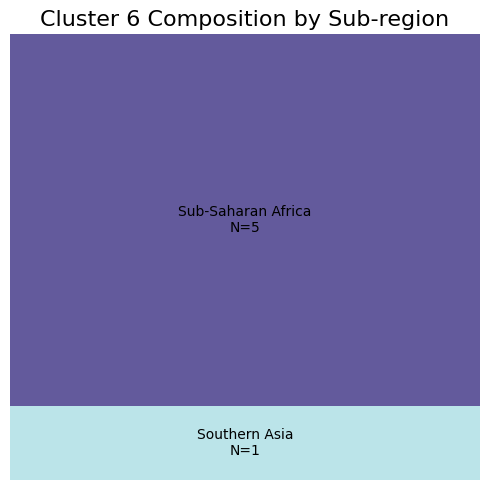

In [35]:

# Define sub-region colours

subregion_colours = {
    'Northern Africa': 'slateblue',
    'Sub-Saharan Africa': 'darkslateblue',
    'Central Asia': 'teal',
    'Eastern Asia': 'darkturquoise',
    'South-eastern Asia': 'cadetblue',
    'Southern Asia': 'powderblue',
    'Western Asia': 'lightseagreen',
    'Eastern Europe': 'lightcoral',
    'Southern Europe': 'indianred',
    'LAC': 'orchid',
    'Melanesia': 'mediumvioletred'
}

# Replace sub-region name for consistency
df_kmeans_PC['Sub-region Name'] = df_kmeans_PC['Sub-region Name'].replace({
    'Latin America and the Caribbean': 'LAC'
})

# Filter Cluster 6
cluster_6 = df_kmeans_PC[df_kmeans_PC['Cluster'] == 5].copy()

# Group by sub-region and count countries
subregion_grouped = cluster_6.groupby('Sub-region Name')['COUNTRY'].apply(list)
cluster6_subregion_counts = subregion_grouped.apply(len)

# Build labels: just Sub-region and N=
labels = [
    f"{subregion}\nN={count}"
    for subregion, count in zip(subregion_grouped.index, cluster6_subregion_counts.values)
]

# Get colours per sub-region
colour_list = [
    subregion_colours[subregion]
    for subregion in subregion_grouped.index
]

# Plot
sizes = cluster6_subregion_counts.values

plt.figure(figsize=(5, 5))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colour_list,
    alpha=0.85,
    text_kwargs={'fontsize': 10, 'color': 'black'}
)
plt.title('Cluster 6 Composition by Sub-region', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


## Radar

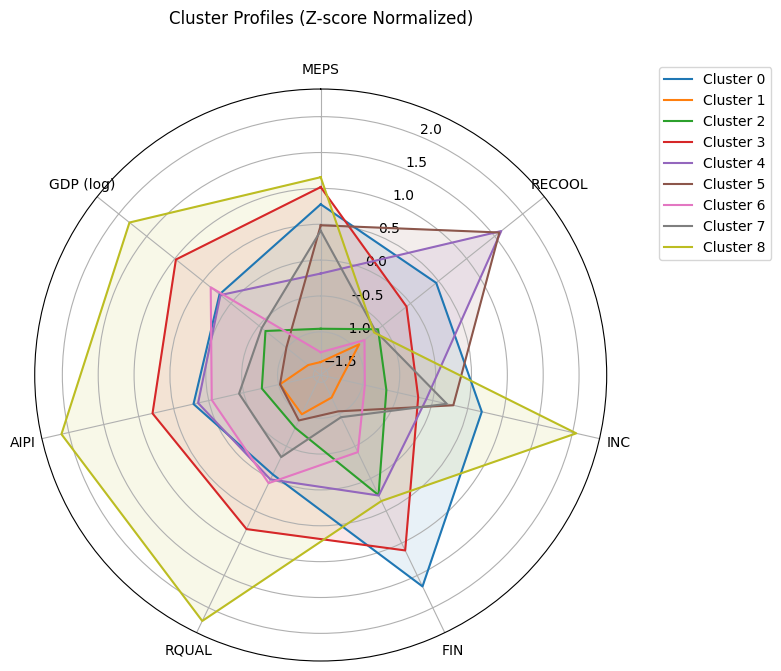

In [36]:
import numpy as np


indicators = ["MEPS_2023", "RECOOL_2023", "INC_2023", "FIN_2023", "RQUAL_2023", "AIPI_2023", "log_GDPCAPITA_2023"]


cluster_means_only = cluster_summary_PC.loc[
    cluster_summary_PC.index.to_series().apply(lambda x: str(x).isdigit())
][indicators]

# Apply z-score standardization to cluster means
cluster_means_zscore = (cluster_means_only - cluster_means_only.mean()) / cluster_means_only.std()

# Radar chart setup for z-score normalized data
labels = ["MEPS", "RECOOL", "INC", "FIN", "RQUAL", "AIPI","GDP (log)"]
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
colors = plt.cm.tab10.colors

# Plot each cluster
for i, (index, row) in enumerate(cluster_means_zscore.iterrows()):
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {index}', color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

# Formatting
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Cluster Profiles (Z-score Normalized)", y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.05))
plt.tight_layout()
plt.savefig("clusters_radar.png", dpi=300, bbox_inches='tight')
plt.show()


## Cluster Comparison: Bar Chart

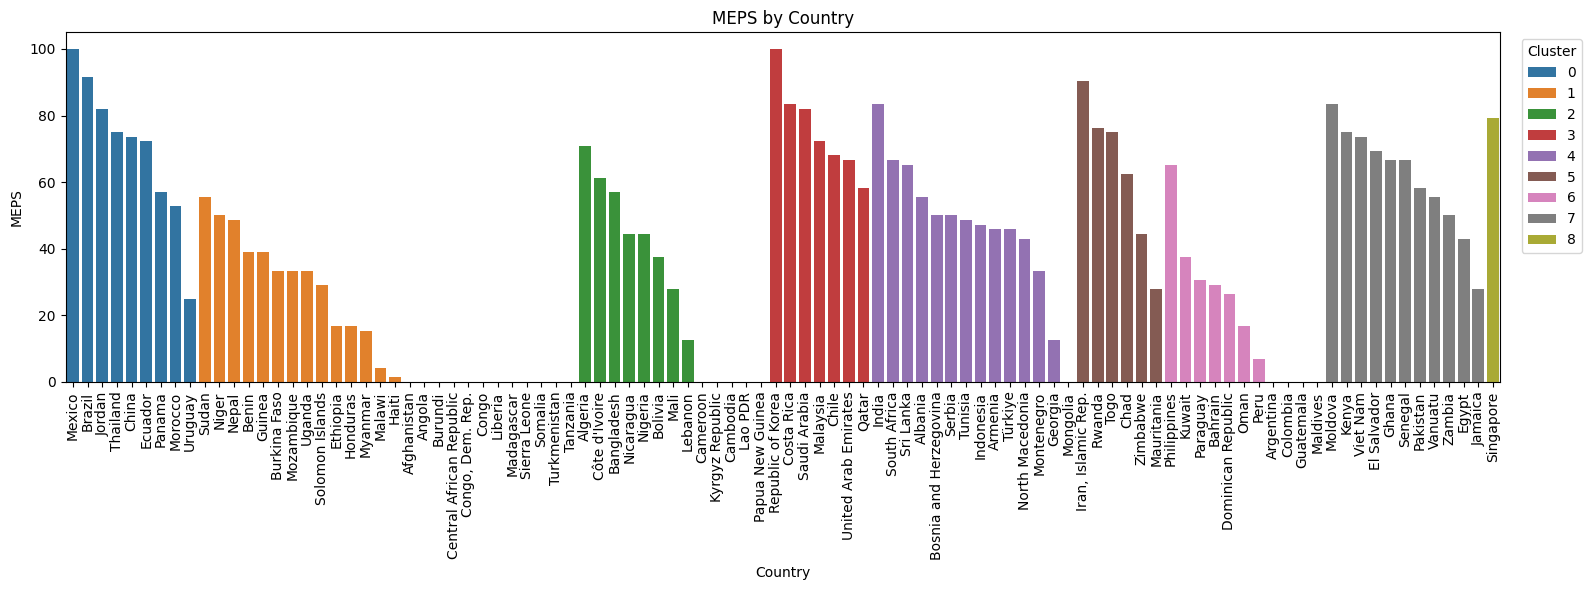

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Sort countries by cluster and PC1_Energy
df_kmeans_sorted_PC = (
    df_kmeans_PC.sort_values(["Cluster", "MEPS_2023"], ascending=[True, False])
    .copy()
)

# Set figure size
plt.figure(figsize=(16, 6))

# Create barplot
sns.barplot(
    data=df_kmeans_sorted_PC,
    x="COUNTRY",
    y="MEPS_2023",
    hue="Cluster",
    dodge=False,
    palette="tab10"
)

# Improve readability
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("MEPS")
plt.title("MEPS by Country")
plt.legend(title="Cluster", bbox_to_anchor=(1.01, 1), loc="upper left")
plt.tight_layout()
plt.show()

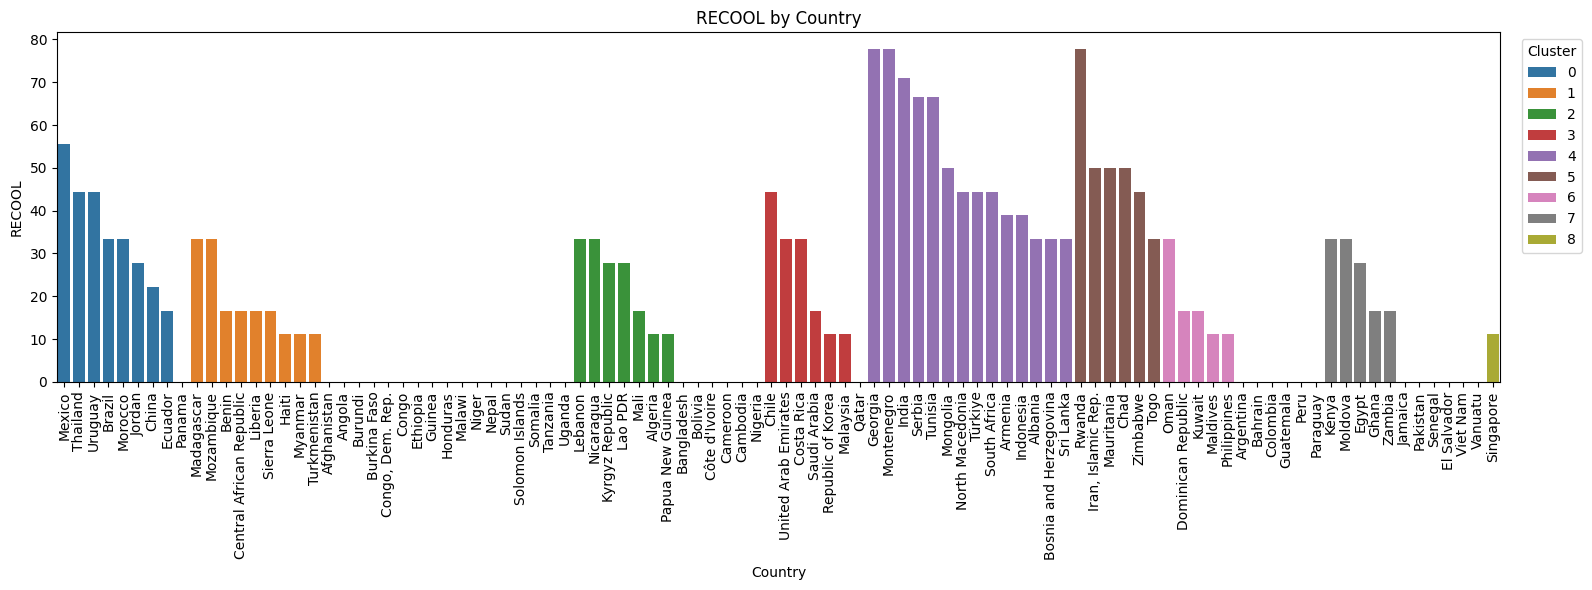

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Sort countries by cluster and PC1_Energy
df_kmeans_sorted_PC = (
    df_kmeans_PC.sort_values(["Cluster", "RECOOL_2023"], ascending=[True, False])
    .copy()
)

# Set figure size
plt.figure(figsize=(16, 6))

# Create barplot
sns.barplot(
    data=df_kmeans_sorted_PC,
    x="COUNTRY",
    y="RECOOL_2023",
    hue="Cluster",
    dodge=False,
    palette="tab10"
)

# Improve readability
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("RECOOL")
plt.title("RECOOL by Country")
plt.legend(title="Cluster", bbox_to_anchor=(1.01, 1), loc="upper left")
plt.tight_layout()
plt.show()

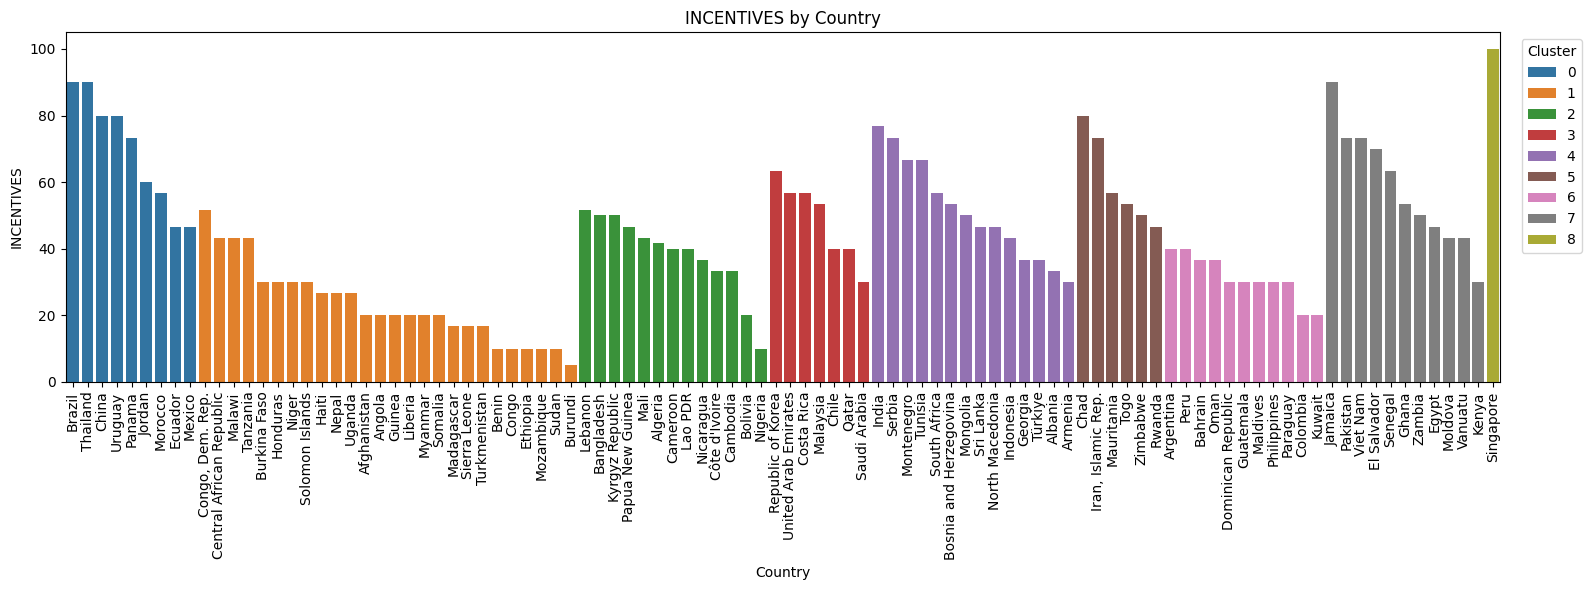

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Sort countries by cluster and PC1_Energy
df_kmeans_sorted_PC = (
    df_kmeans_PC.sort_values(["Cluster", "INC_2023"], ascending=[True, False])
    .copy()
)

# Set figure size
plt.figure(figsize=(16, 6))

# Create barplot
sns.barplot(
    data=df_kmeans_sorted_PC,
    x="COUNTRY",
    y="INC_2023",
    hue="Cluster",
    dodge=False,
    palette="tab10"
)

# Improve readability
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("INCENTIVES")
plt.title("INCENTIVES by Country")
plt.legend(title="Cluster", bbox_to_anchor=(1.01, 1), loc="upper left")
plt.tight_layout()
plt.show()

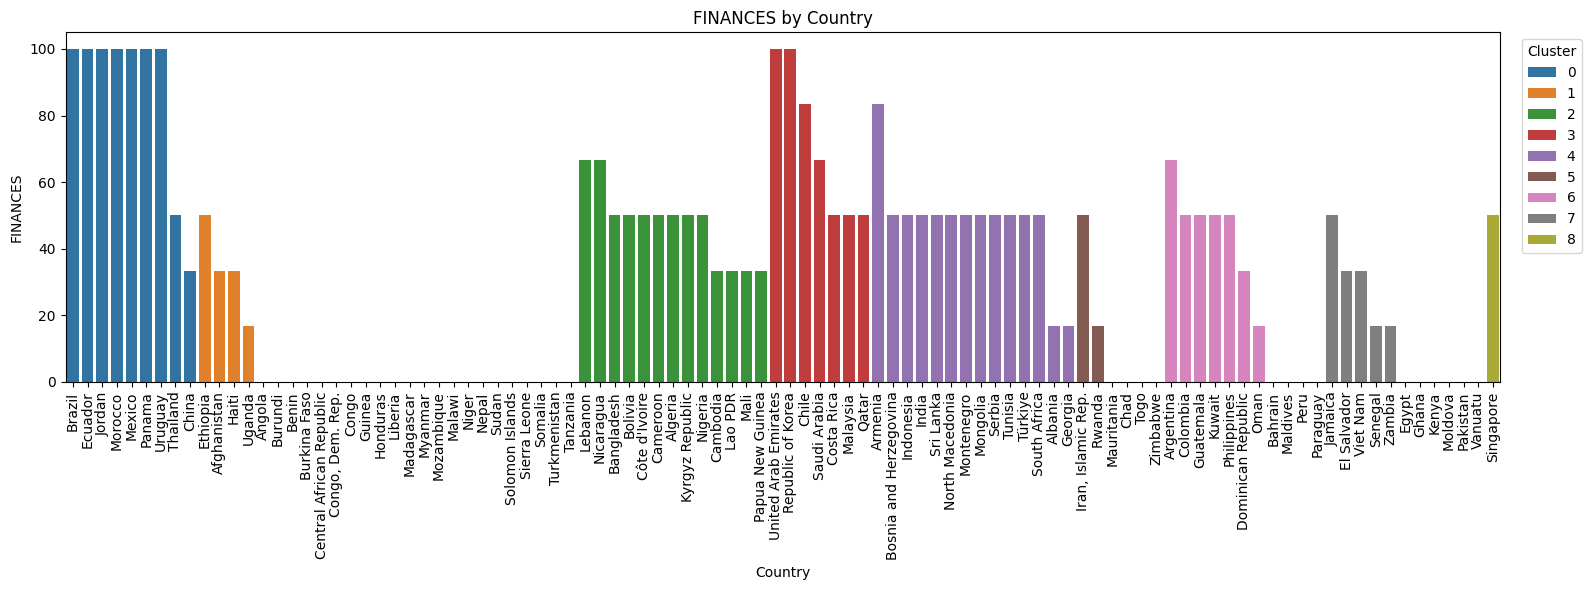

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Sort countries by cluster and PC1_Energy
df_kmeans_sorted_PC = (
    df_kmeans_PC.sort_values(["Cluster", "FIN_2023"], ascending=[True, False])
    .copy()
)

# Set figure size
plt.figure(figsize=(16, 6))

# Create barplot
sns.barplot(
    data=df_kmeans_sorted_PC,
    x="COUNTRY",
    y="FIN_2023",
    hue="Cluster",
    dodge=False,
    palette="tab10"
)

# Improve readability
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("FINANCES")
plt.title("FINANCES by Country")
plt.legend(title="Cluster", bbox_to_anchor=(1.01, 1), loc="upper left")
plt.tight_layout()
plt.show()

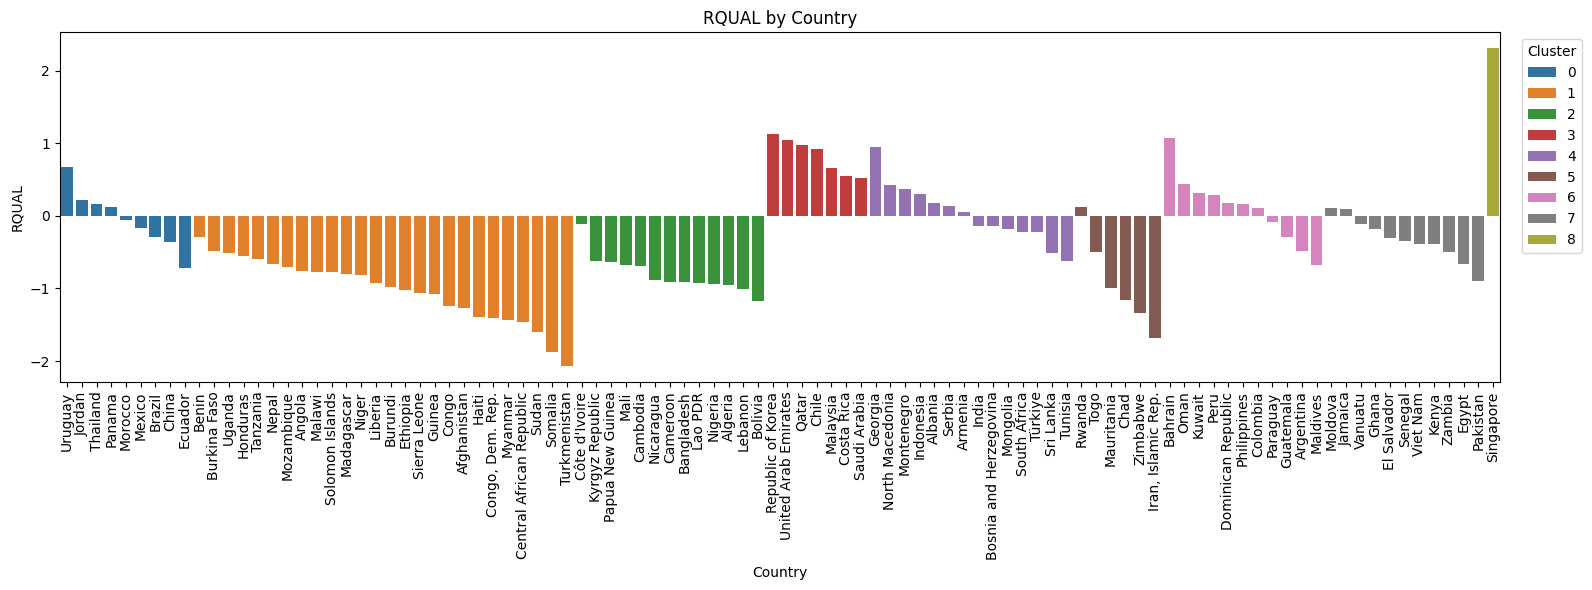

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Sort countries by cluster and PC1_Energy
df_kmeans_sorted_PC = (
    df_kmeans_PC.sort_values(["Cluster", "RQUAL_2023"], ascending=[True, False])
    .copy()
)

# Set figure size
plt.figure(figsize=(16, 6))

# Create barplot
sns.barplot(
    data=df_kmeans_sorted_PC,
    x="COUNTRY",
    y="RQUAL_2023",
    hue="Cluster",
    dodge=False,
    palette="tab10"
)

# Improve readability
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("RQUAL")
plt.title("RQUAL by Country")
plt.legend(title="Cluster", bbox_to_anchor=(1.01, 1), loc="upper left")
plt.tight_layout()
plt.show()

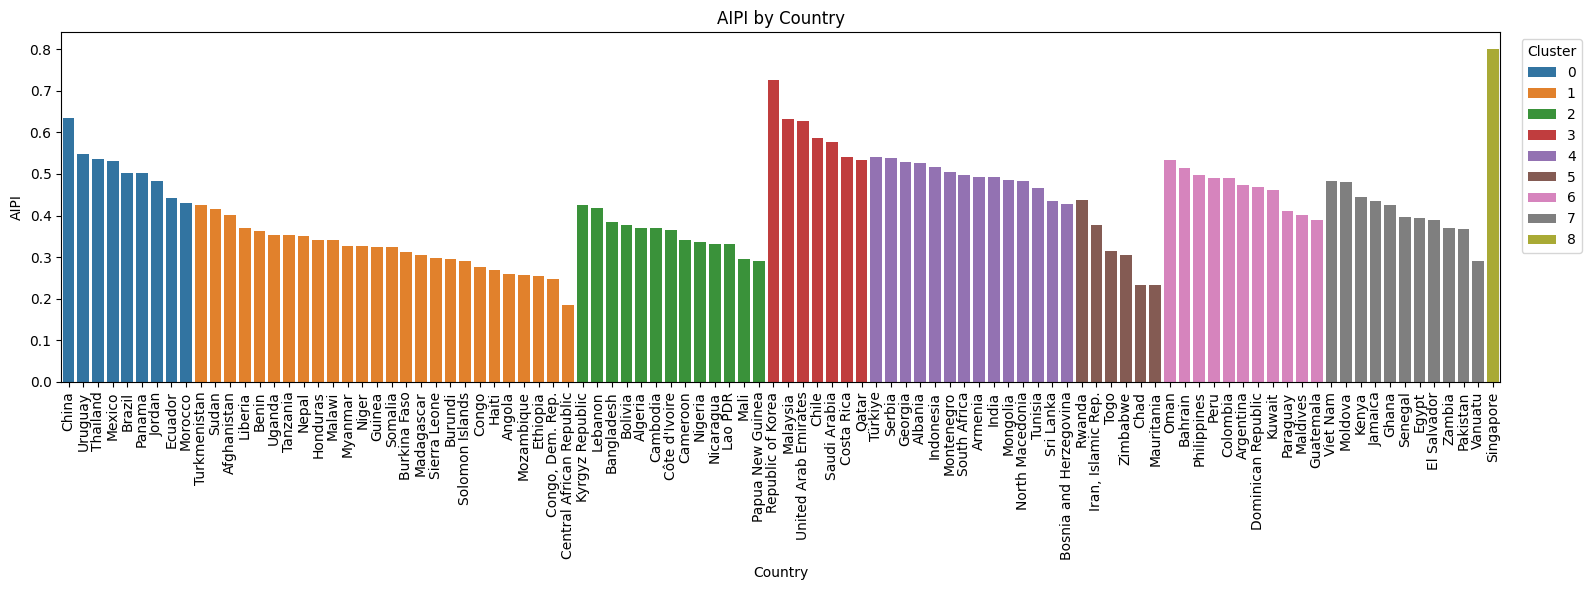

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Sort countries by cluster and PC1_Energy
df_kmeans_sorted_PC = (
    df_kmeans_PC.sort_values(["Cluster", "AIPI_2023"], ascending=[True, False])
    .copy()
)

# Set figure size
plt.figure(figsize=(16, 6))

# Create barplot
sns.barplot(
    data=df_kmeans_sorted_PC,
    x="COUNTRY",
    y="AIPI_2023",
    hue="Cluster",
    dodge=False,
    palette="tab10"
)

# Improve readability
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("AIPI")
plt.title("AIPI by Country")
plt.legend(title="Cluster", bbox_to_anchor=(1.01, 1), loc="upper left")
plt.tight_layout()
plt.show()

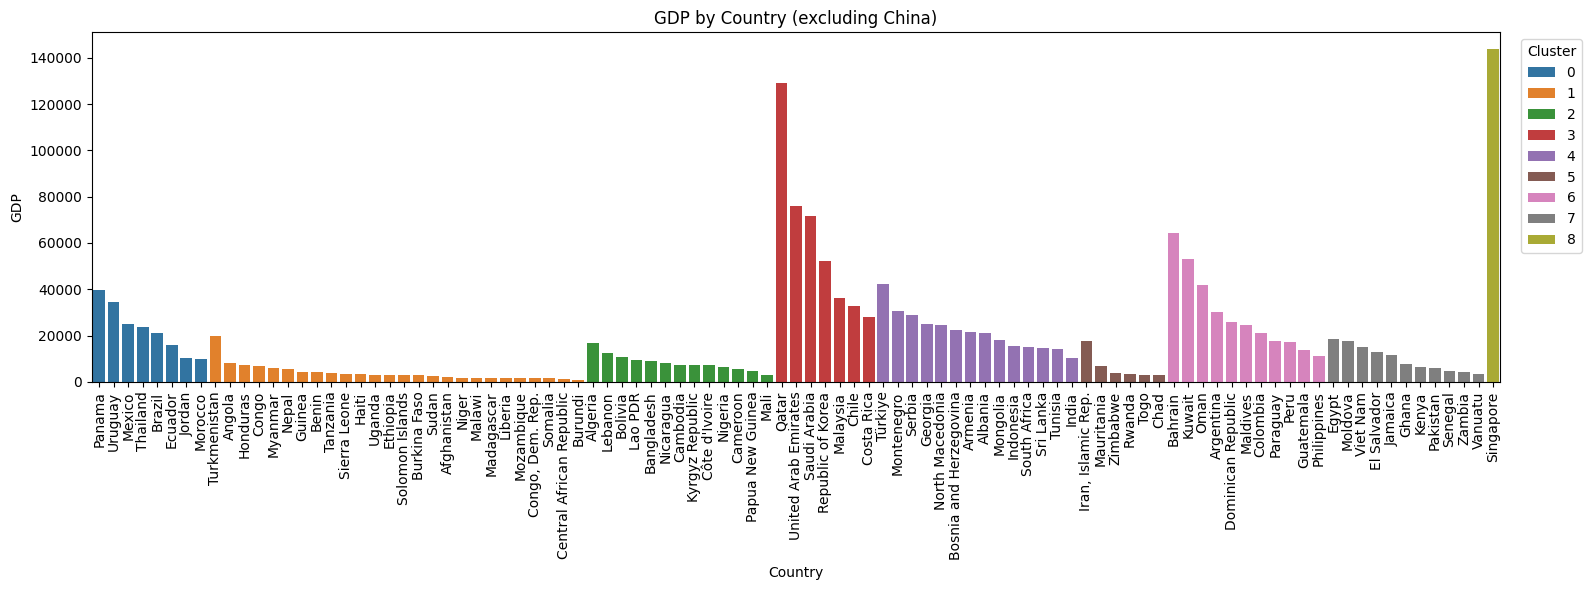

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
# Remove China
df_kmeans_filtered_PC = df_kmeans_PC[df_kmeans_PC["COUNTRY"] != "China"].copy()

# Sort countries by cluster and GDP
df_kmeans_sorted_PC = df_kmeans_filtered_PC.sort_values(["Cluster", "GDPCAPITA_2023"], ascending=[True, False])

# Set figure size
plt.figure(figsize=(16, 6))

# Create barplot
sns.barplot(
    data=df_kmeans_sorted_PC,
    x="COUNTRY",
    y="GDPCAPITA_2023",
    hue="Cluster",
    dodge=False,
    palette="tab10"
)

# Improve readability
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("GDP")
plt.title("GDP by Country (excluding China)")
plt.legend(title="Cluster", bbox_to_anchor=(1.01, 1), loc="upper left")
plt.tight_layout()
plt.show()

## Individual Clusters Analysis (pending update)
### Cluster 0

In [44]:
# Filter only Cluster 0
cluster_0_data = df_kmeans_PC[df_kmeans_PC["Cluster"] == 0].copy()

# Select relevant columns
cluster_0_table = cluster_0_data[[
    "Sub-region Name", "COUNTRY",
    "MEPS_2023", "RECOOL_2023", "INC_2023","FIN_2023","RQUAL_2023", "AIPI_2023", "GDPCAPITA_2023", "TOTALHIGH_2023"
]]

# Rename to acronyms
cluster_0_table = cluster_0_table.rename(columns={
    "MEPS_2023": "MEPS",
    "RECOOL_2023": "RECOOL",
    "INC_2023": "INC",
    "FIN_2023": "FIN",
    "RQUAL_2023": "RQUAL",
    "AIPI_2023": "AIPI",
    "GDPCAPITA_2023": "GDP",
    "TOTALHIGH_2023": "RISK"
})


cluster_0_table = cluster_0_table.round(2)
cluster_0_table = cluster_0_table.sort_values(by="Sub-region Name").reset_index(drop=True)
cluster_0_table = cluster_0_table.rename(columns={"Sub-region Name": "SUB-REGION"})
cluster_avg = cluster_0_table[["MEPS", "RECOOL","INC","FIN", "RQUAL", "AIPI", "GDP","RISK"]].mean().round(2)

# Create a dictionary for the new row
summary_row = {
    "SUB-REGION": "Cluster 0 Average",
    "COUNTRY": "",  # leave blank or use e.g. 'Average'
    "MEPS": cluster_avg["MEPS"],
    "RECOOL": cluster_avg["RECOOL"],
    "INC": cluster_avg["INC"],
    "FIN": cluster_avg["FIN"],
    "RQUAL": cluster_avg["RQUAL"],
    "AIPI": cluster_avg["AIPI"],
    "GDP": cluster_avg["GDP"],
    "RISK": cluster_avg["RISK"]
}

cluster_0_table = pd.concat(
    [cluster_0_table, pd.DataFrame([summary_row])],
    ignore_index=True
)

cluster_0_table

,SUB-REGION,COUNTRY,MEPS,RECOOL,INC,FIN,RQUAL,AIPI,GDP,RISK
0,Eastern Asia,China,73.61,22.22,80.00,33.33,-0.36,0.64,25179.12,150.35
1,LAC,Brazil,91.67,33.33,90.00,100.00,-0.30,0.50,21175.62,34.19
2,LAC,Ecuador,72.22,16.67,46.67,100.00,-0.72,0.44,15918.52,0.74
3,LAC,Mexico,100.00,55.56,46.67,100.00,-0.17,0.53,24854.58,10.50
4,LAC,Panama,56.94,0.00,73.33,100.00,0.12,0.50,39803.32,NaN
5,LAC,Uruguay,25.00,44.44,80.00,100.00,0.68,0.55,34470.93,NaN
6,Northern Africa,Morocco,52.78,33.33,56.67,100.00,-0.06,0.43,9842.89,2.07
7,South-eastern Asia,Thailand,75.00,44.44,90.00,50.00,0.16,0.54,23519.21,1.69
8,Western Asia,Jordan,81.94,27.78,60.00,100.00,0.22,0.48,10411.84,0.82
9,Cluster 0 Average,,69.91,30.86,69.26,87.04,-0.05,0.51,22797.34,28.62


/tmp/ipykernel_138/4028163123.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_138/4028163123.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


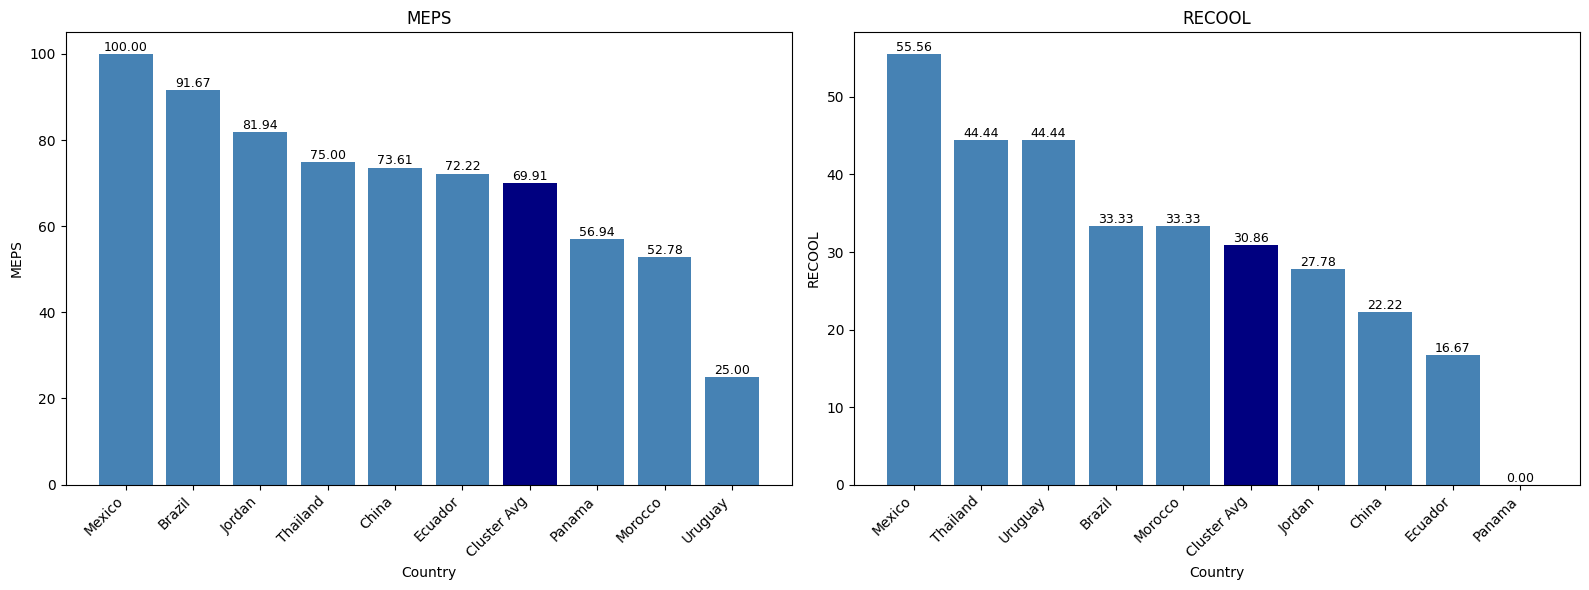

/tmp/ipykernel_138/4028163123.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_138/4028163123.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


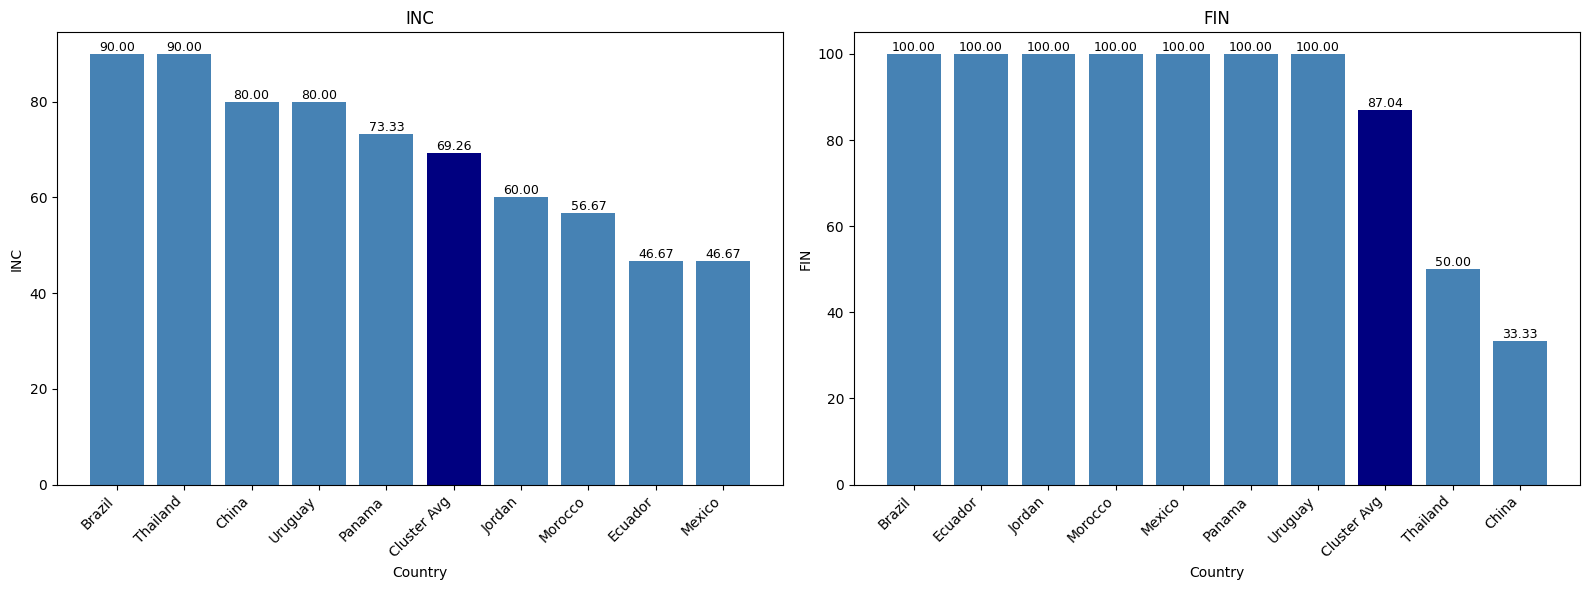

/tmp/ipykernel_138/4028163123.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_138/4028163123.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


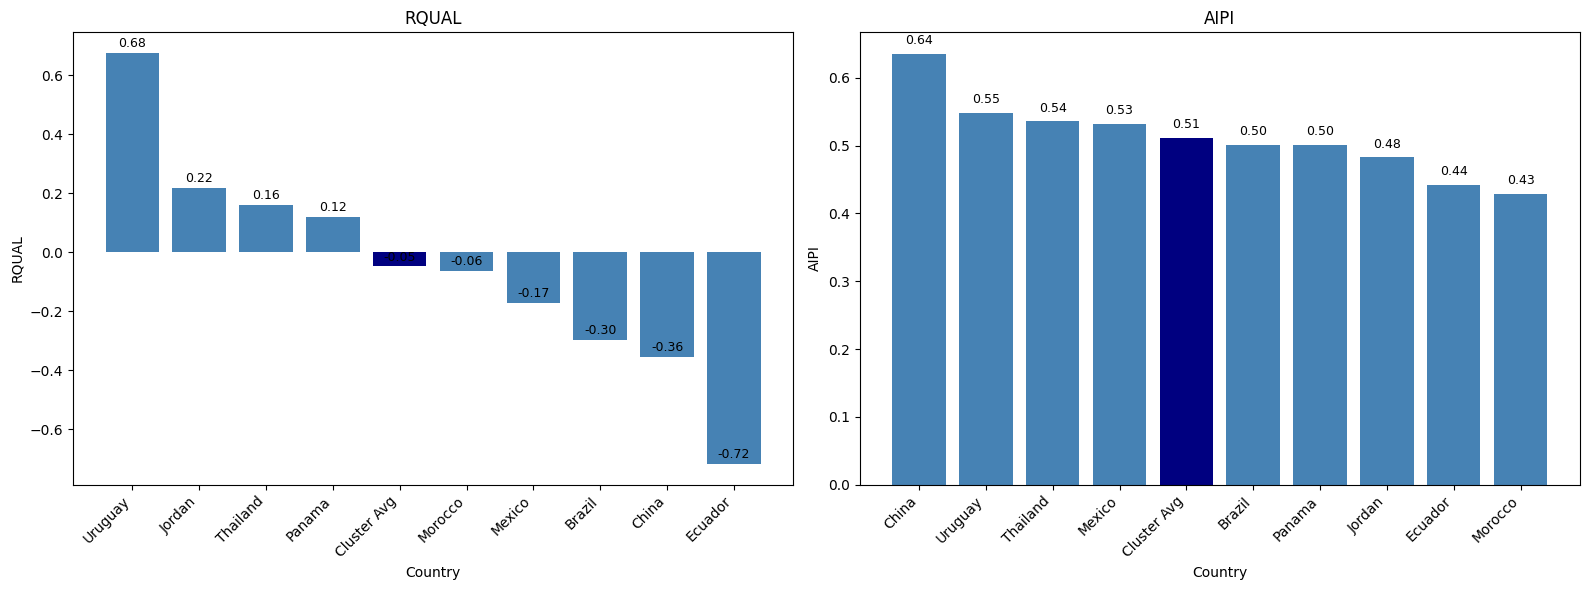

In [45]:
# Indicators grouped in pairs
indicator_pairs = [
    ("MEPS_2023", "RECOOL_2023"),
    ("INC_2023", "FIN_2023"),
    ("RQUAL_2023", "AIPI_2023")
]

# Plot pairs
for ind1, ind2 in indicator_pairs:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    for ax, indicator in zip(axes, [ind1, ind2]):
        # Get cluster data
        cluster_data = df_kmeans_PC[df_kmeans_PC["Cluster"] == 0][["COUNTRY", indicator]].copy()
        cluster_avg = cluster_data[indicator].mean()

        # Append cluster average row
        cluster_data = pd.concat([
            cluster_data,
            pd.DataFrame({"COUNTRY": ["Cluster Avg"], indicator: [cluster_avg]})
        ], ignore_index=True)

        # Sort and assign colours
        cluster_data = cluster_data.sort_values(by=indicator, ascending=False).reset_index(drop=True)
        colours = ["steelblue"] * len(cluster_data)
        cluster_avg_index = cluster_data[cluster_data["COUNTRY"] == "Cluster Avg"].index[0]
        colours[cluster_avg_index] = "navy"

        # Plot
        bars = ax.bar(cluster_data["COUNTRY"], cluster_data[indicator], color=colours)

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.01,
                f"{height:.2f}",
                ha='center', va='bottom', fontsize=9
            )

        ax.set_title(f"{indicator.replace('_2023', '')}")
        ax.set_ylabel(indicator.replace("_2023", ""))
        ax.set_xlabel("Country")
        ax.tick_params(axis='x', rotation=45)
        ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')

        filename = f"cluster0_{indicator}.png"
    
    plt.tight_layout()
    plt.show()    

   

### Cluster 1

In [46]:
# Filter by Cluster
cluster_1_data = df_kmeans_PC[df_kmeans_PC["Cluster"] == 1].copy()

# Select relevant columns
cluster_1_table = cluster_1_data[[
    "Sub-region Name", "COUNTRY",
    "MEPS_2023", "RECOOL_2023", "INC_2023","FIN_2023","RQUAL_2023", "AIPI_2023", "GDPCAPITA_2023", "TOTALHIGH_2023"
]]

# Rename to acronyms
cluster_1_table = cluster_1_table.rename(columns={
    "MEPS_2023": "MEPS",
    "RECOOL_2023": "RECOOL",
    "INC_2023": "INC",
    "FIN_2023": "FIN",
    "RQUAL_2023": "RQUAL",
    "AIPI_2023": "AIPI",
    "GDPCAPITA_2023": "GDP",
    "TOTALHIGH_2023": "RISK"
})


cluster_1_table = cluster_1_table.round(2)
cluster_1_table = cluster_1_table.sort_values(by="Sub-region Name").reset_index(drop=True)
cluster_1_table = cluster_1_table.rename(columns={"Sub-region Name": "SUB-REGION"})
cluster_avg = cluster_1_table[["MEPS", "RECOOL","INC","FIN", "RQUAL", "AIPI", "GDP","RISK"]].mean().round(2)

# Create a dictionary for the new row
summary_row = {
    "SUB-REGION": "Cluster 1 Average",
    "COUNTRY": "",  # leave blank or use e.g. 'Average'
    "MEPS": cluster_avg["MEPS"],
    "RECOOL": cluster_avg["RECOOL"],
    "INC": cluster_avg["INC"],
    "FIN": cluster_avg["FIN"],
    "RQUAL": cluster_avg["RQUAL"],
    "AIPI": cluster_avg["AIPI"],
    "GDP": cluster_avg["GDP"],
    "RISK": cluster_avg["RISK"]
}

cluster_1_table = pd.concat(
    [cluster_1_table, pd.DataFrame([summary_row])],
    ignore_index=True
)

cluster_1_table

,SUB-REGION,COUNTRY,MEPS,RECOOL,INC,FIN,RQUAL,AIPI,GDP,RISK
0,Central Asia,Turkmenistan,0.00,11.11,16.67,0.00,-2.07,0.43,19828.92,0.07
1,LAC,Honduras,16.67,0.00,30.00,0.00,-0.55,0.34,7178.34,0.96
2,LAC,Haiti,1.39,11.11,26.67,33.33,-1.39,0.27,3281.21,NaN
3,Melanesia,Solomon Islands,29.17,0.00,30.00,0.00,-0.78,0.29,2800.82,NaN
4,Northern Africa,Sudan,55.56,0.00,10.00,0.00,-1.60,0.41,2420.66,20.72
5,South-eastern Asia,Myanmar,15.28,11.11,20.00,0.00,-1.44,0.33,5953.36,8.34
6,Southern Asia,Afghanistan,0.00,0.00,20.00,33.33,-1.27,0.40,2201.72,1.25
7,Southern Asia,Nepal,48.61,0.00,26.67,0.00,-0.66,0.35,5395.21,2.66
8,Sub-Saharan Africa,Somalia,0.00,0.00,20.00,0.00,-1.88,0.32,1556.52,4.94
9,Sub-Saharan Africa,Sierra Leone,0.00,16.67,16.67,0.00,-1.06,0.30,3371.35,1.17


/tmp/ipykernel_138/3963582644.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_138/3963582644.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


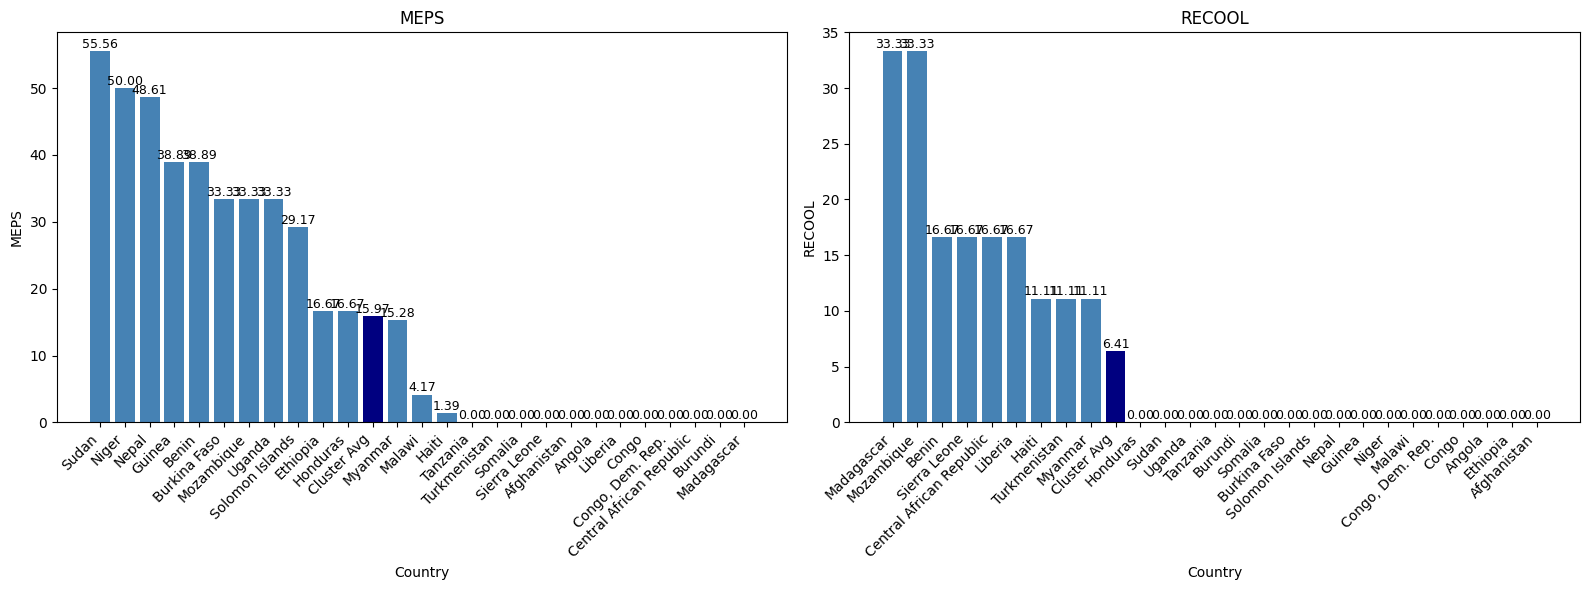

/tmp/ipykernel_138/3963582644.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_138/3963582644.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


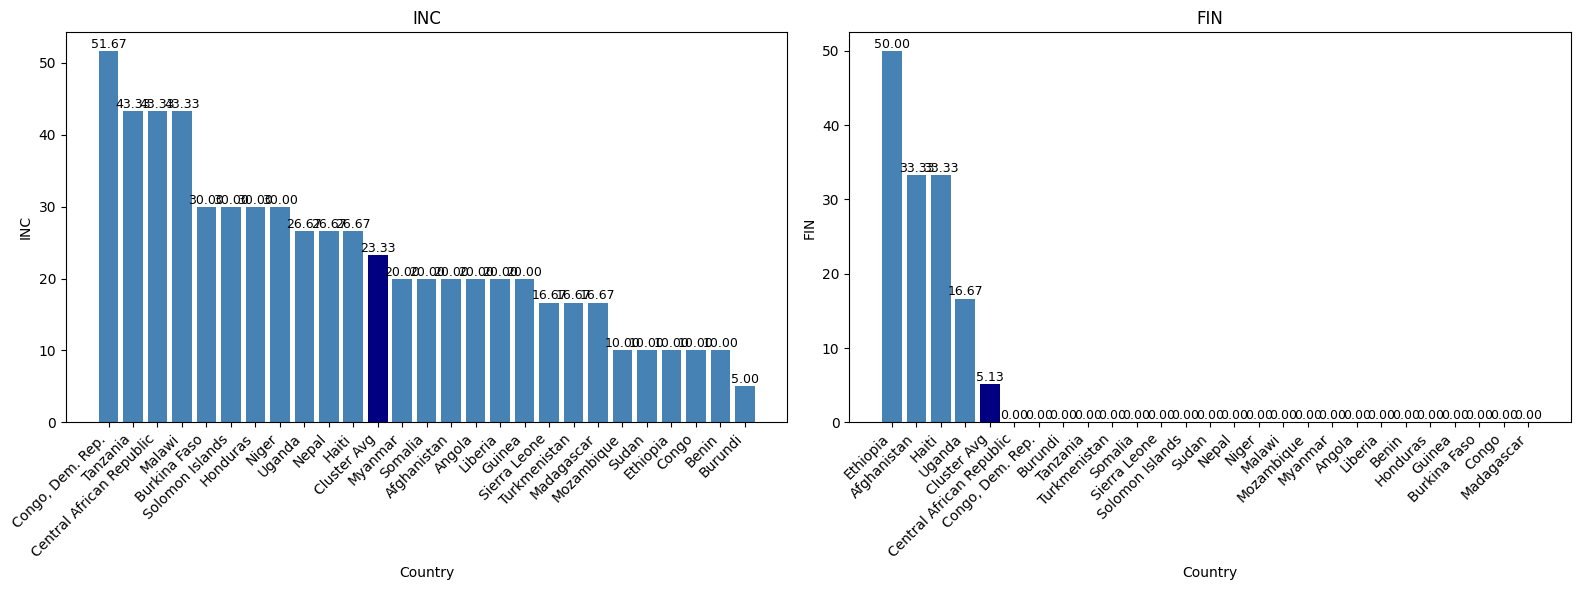

/tmp/ipykernel_138/3963582644.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_138/3963582644.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


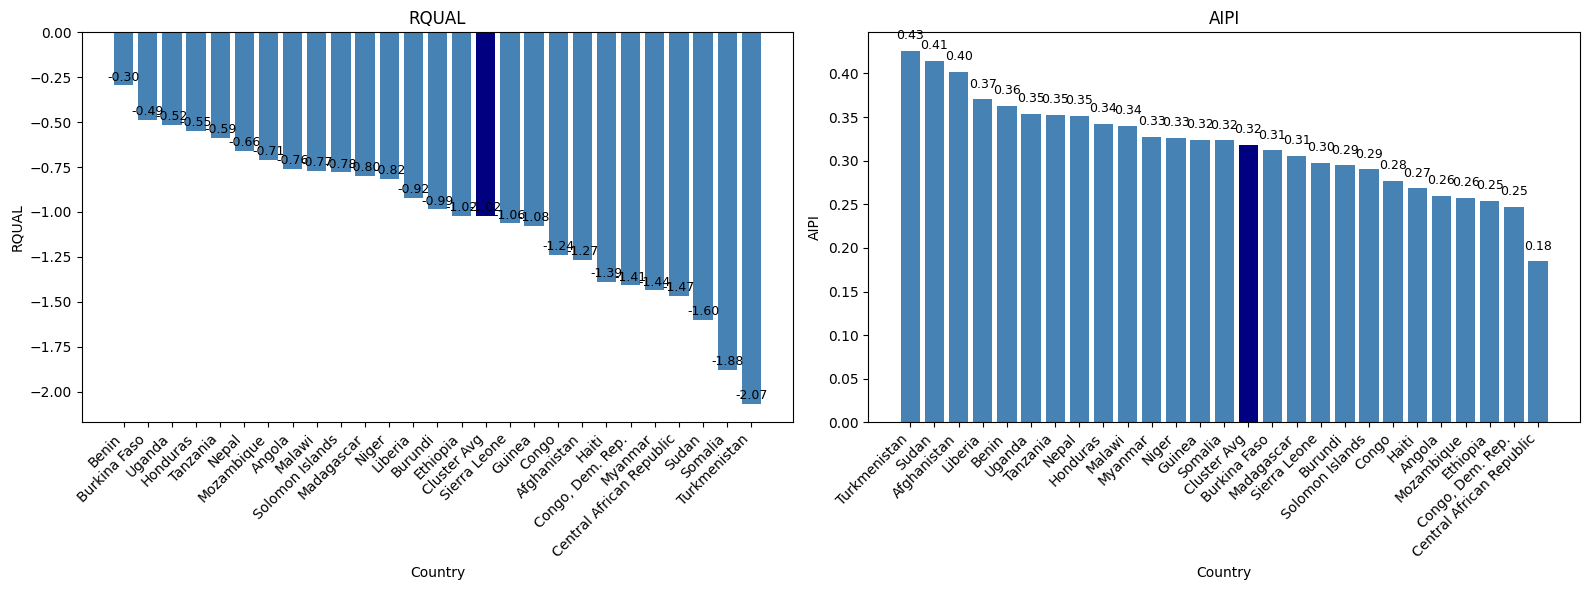

In [47]:
# Indicators grouped in pairs
indicator_pairs = [
    ("MEPS_2023", "RECOOL_2023"),
    ("INC_2023", "FIN_2023"),
    ("RQUAL_2023", "AIPI_2023")
]

# Plot pairs
for ind1, ind2 in indicator_pairs:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    for ax, indicator in zip(axes, [ind1, ind2]):
        # Get cluster data
        cluster_data = df_kmeans_PC[df_kmeans_PC["Cluster"] == 1][["COUNTRY", indicator]].copy()
        cluster_avg = cluster_data[indicator].mean()

        # Append cluster average row
        cluster_data = pd.concat([
            cluster_data,
            pd.DataFrame({"COUNTRY": ["Cluster Avg"], indicator: [cluster_avg]})
        ], ignore_index=True)

        # Sort and assign colours
        cluster_data = cluster_data.sort_values(by=indicator, ascending=False).reset_index(drop=True)
        colours = ["steelblue"] * len(cluster_data)
        cluster_avg_index = cluster_data[cluster_data["COUNTRY"] == "Cluster Avg"].index[0]
        colours[cluster_avg_index] = "navy"

        # Plot
        bars = ax.bar(cluster_data["COUNTRY"], cluster_data[indicator], color=colours)

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.01,
                f"{height:.2f}",
                ha='center', va='bottom', fontsize=9
            )

        ax.set_title(f"{indicator.replace('_2023', '')}")
        ax.set_ylabel(indicator.replace("_2023", ""))
        ax.set_xlabel("Country")
        ax.tick_params(axis='x', rotation=45)
        ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

### Cluster 2

In [48]:
# Filter by Cluster
cluster_2_data = df_kmeans_PC[df_kmeans_PC["Cluster"] == 2].copy()

# Select relevant columns
cluster_2_table = cluster_2_data[[
    "Sub-region Name", "COUNTRY",
    "MEPS_2023", "RECOOL_2023", "INC_2023","FIN_2023","RQUAL_2023", "AIPI_2023", "GDPCAPITA_2023", "TOTALHIGH_2023"
]]

# Rename to acronyms
cluster_2_table = cluster_2_table.rename(columns={
    "MEPS_2023": "MEPS",
    "RECOOL_2023": "RECOOL",
    "INC_2023": "INC",
    "FIN_2023": "FIN",
    "RQUAL_2023": "RQUAL",
    "AIPI_2023": "AIPI",
    "GDPCAPITA_2023": "GDP",
    "TOTALHIGH_2023": "RISK"
})


cluster_2_table = cluster_2_table.round(2)
cluster_2_table = cluster_2_table.sort_values(by="Sub-region Name").reset_index(drop=True)
cluster_2_table = cluster_2_table.rename(columns={"Sub-region Name": "SUB-REGION"})
cluster_avg = cluster_2_table[["MEPS", "RECOOL","INC","FIN", "RQUAL", "AIPI", "GDP","RISK"]].mean().round(2)

# Create a dictionary for the new row
summary_row = {
    "SUB-REGION": "Cluster Average",
    "COUNTRY": "",  # leave blank or use e.g. 'Average'
    "MEPS": cluster_avg["MEPS"],
    "RECOOL": cluster_avg["RECOOL"],
    "INC": cluster_avg["INC"],
    "FIN": cluster_avg["FIN"],
    "RQUAL": cluster_avg["RQUAL"],
    "AIPI": cluster_avg["AIPI"],
    "GDP": cluster_avg["GDP"],
    "RISK": cluster_avg["RISK"]
}

cluster_2_table = pd.concat(
    [cluster_2_table, pd.DataFrame([summary_row])],
    ignore_index=True
)

cluster_2_table


,SUB-REGION,COUNTRY,MEPS,RECOOL,INC,FIN,RQUAL,AIPI,GDP,RISK
0,Central Asia,Kyrgyz Republic,0.00,27.78,50.00,50.00,-0.62,0.43,7298.09,NaN
1,LAC,Bolivia,37.50,0.00,20.00,50.00,-1.18,0.38,10925.27,3.10
2,LAC,Nicaragua,44.44,33.33,36.67,66.67,-0.88,0.33,8319.98,NaN
3,Melanesia,Papua New Guinea,0.00,11.11,46.67,33.33,-0.64,0.29,4667.84,3.30
4,Northern Africa,Algeria,70.83,11.11,41.67,50.00,-0.95,0.37,16824.49,2.71
5,South-eastern Asia,Cambodia,0.00,0.00,33.33,33.33,-0.68,0.37,7430.73,1.15
6,South-eastern Asia,Lao PDR,0.00,27.78,40.00,33.33,-0.93,0.33,9291.79,0.92
7,Southern Asia,Bangladesh,56.94,0.00,50.00,50.00,-0.91,0.38,9147.78,36.76
8,Sub-Saharan Africa,Côte d'Ivoire,61.11,0.00,33.33,50.00,-0.12,0.37,7227.03,8.90
9,Sub-Saharan Africa,Cameroon,0.00,0.00,40.00,50.00,-0.91,0.34,5405.57,10.67


/tmp/ipykernel_138/2862981631.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_138/2862981631.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


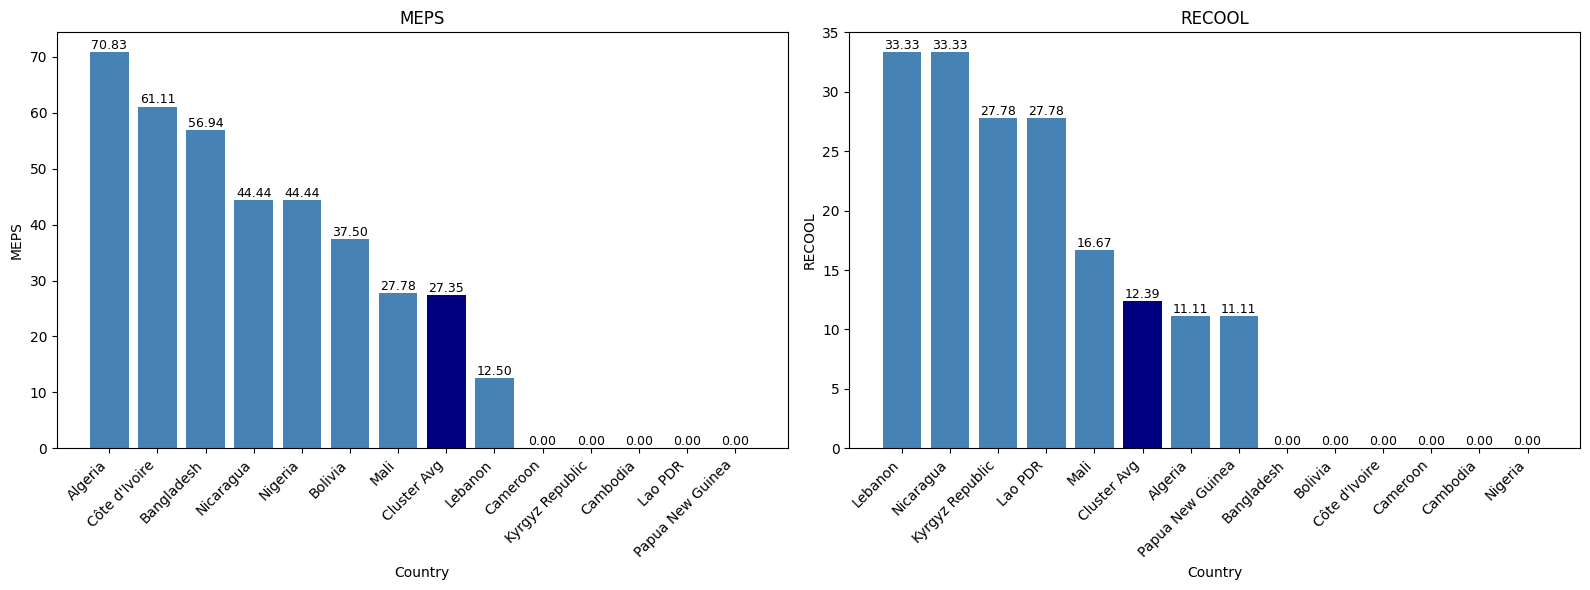

/tmp/ipykernel_138/2862981631.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_138/2862981631.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


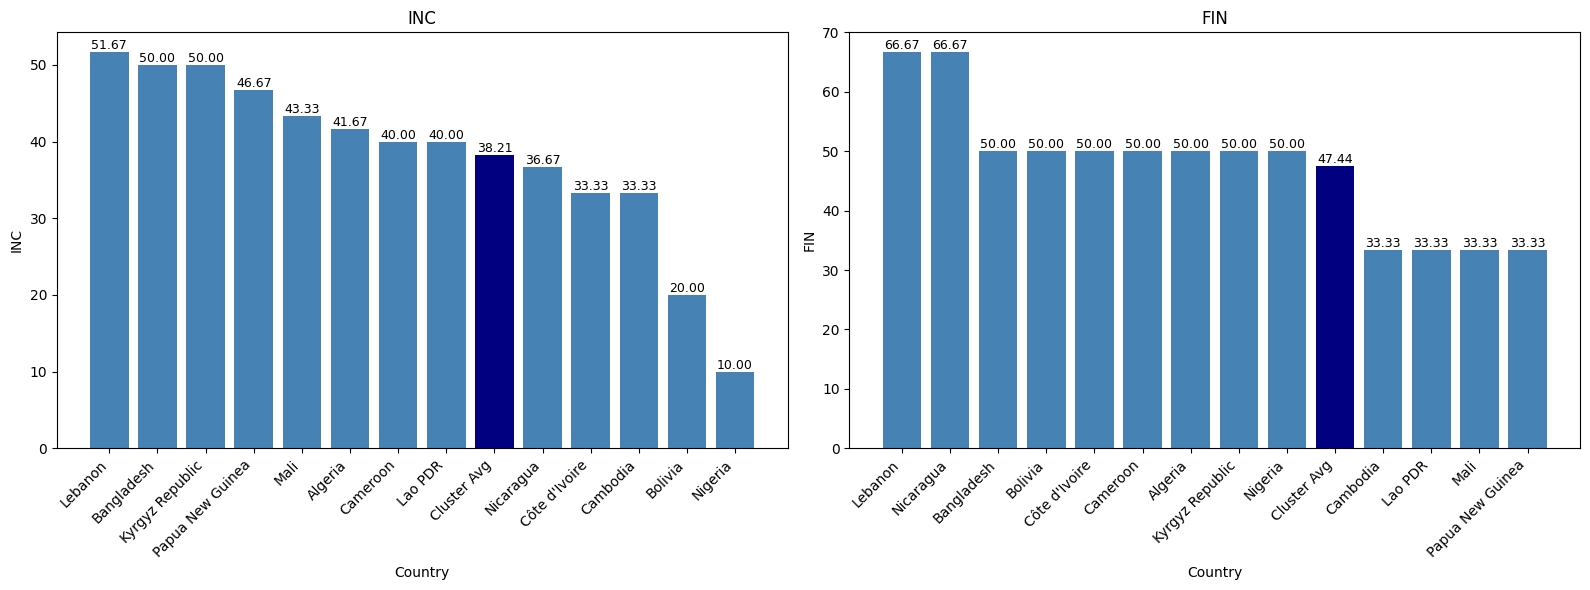

/tmp/ipykernel_138/2862981631.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_138/2862981631.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


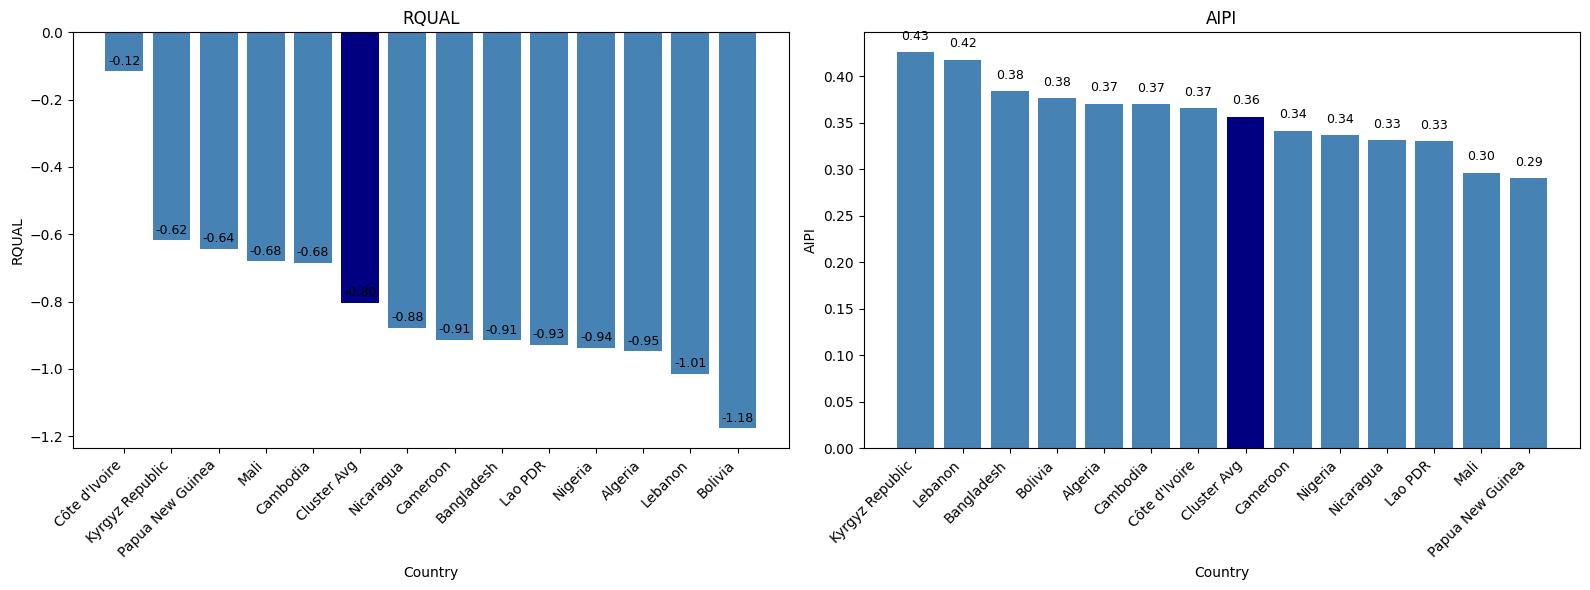

In [49]:
# Indicators grouped in pairs
indicator_pairs = [
    ("MEPS_2023", "RECOOL_2023"),
    ("INC_2023", "FIN_2023"),
    ("RQUAL_2023", "AIPI_2023")
]

# Plot pairs
for ind1, ind2 in indicator_pairs:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    for ax, indicator in zip(axes, [ind1, ind2]):
        # Get cluster data
        cluster_data = df_kmeans_PC[df_kmeans_PC["Cluster"] == 2][["COUNTRY", indicator]].copy()
        cluster_avg = cluster_data[indicator].mean()

        # Append cluster average row
        cluster_data = pd.concat([
            cluster_data,
            pd.DataFrame({"COUNTRY": ["Cluster Avg"], indicator: [cluster_avg]})
        ], ignore_index=True)

        # Sort and assign colours
        cluster_data = cluster_data.sort_values(by=indicator, ascending=False).reset_index(drop=True)
        colours = ["steelblue"] * len(cluster_data)
        cluster_avg_index = cluster_data[cluster_data["COUNTRY"] == "Cluster Avg"].index[0]
        colours[cluster_avg_index] = "navy"

        # Plot
        bars = ax.bar(cluster_data["COUNTRY"], cluster_data[indicator], color=colours)

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.01,
                f"{height:.2f}",
                ha='center', va='bottom', fontsize=9
            )

        ax.set_title(f"{indicator.replace('_2023', '')}")
        ax.set_ylabel(indicator.replace("_2023", ""))
        ax.set_xlabel("Country")
        ax.tick_params(axis='x', rotation=45)
        ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

### Cluster 3

In [51]:

# Filter by Cluster
cluster_3_data = df_kmeans_PC[df_kmeans_PC["Cluster"] == 3].copy()

# Select relevant columns
cluster_3_table = cluster_3_data[[
    "Sub-region Name", "COUNTRY",
    "MEPS_2023", "RECOOL_2023", "INC_2023","FIN_2023","RQUAL_2023", "AIPI_2023", "GDPCAPITA_2023", "TOTALHIGH_2023"
]]

# Rename to acronyms
cluster_3_table = cluster_3_table.rename(columns={
    "MEPS_2023": "MEPS",
    "RECOOL_2023": "RECOOL",
    "INC_2023": "INC",
    "FIN_2023": "FIN",
    "RQUAL_2023": "RQUAL",
    "AIPI_2023": "AIPI",
    "GDPCAPITA_2023": "GDP",
    "TOTALHIGH_2023": "RISK"
})


cluster_3_table = cluster_3_table.round(2)
cluster_3_table = cluster_3_table.sort_values(by="Sub-region Name").reset_index(drop=True)
cluster_3_table = cluster_3_table.rename(columns={"Sub-region Name": "SUB-REGION"})
cluster_avg = cluster_3_table[["MEPS", "RECOOL","INC","FIN", "RQUAL", "AIPI", "GDP","RISK"]].mean().round(2)

# Create a dictionary for the new row
summary_row = {
    "SUB-REGION": "Cluster Average",
    "COUNTRY": "",  # leave blank or use e.g. 'Average'
    "MEPS": cluster_avg["MEPS"],
    "RECOOL": cluster_avg["RECOOL"],
    "INC": cluster_avg["INC"],
    "FIN": cluster_avg["FIN"],
    "RQUAL": cluster_avg["RQUAL"],
    "AIPI": cluster_avg["AIPI"],
    "GDP": cluster_avg["GDP"],
    "RISK": cluster_avg["RISK"]
}

cluster_3_table = pd.concat(
    [cluster_3_table, pd.DataFrame([summary_row])],
    ignore_index=True
)

cluster_3_table

,SUB-REGION,COUNTRY,MEPS,RECOOL,INC,FIN,RQUAL,AIPI,GDP,RISK
0,Eastern Asia,Republic of Korea,100.00,11.11,63.33,100.00,1.12,0.73,52203.97,NaN
1,LAC,Chile,68.06,44.44,40.00,83.33,0.93,0.59,32801.38,NaN
2,LAC,Costa Rica,83.33,33.33,56.67,50.00,0.54,0.54,28075.14,NaN
3,South-eastern Asia,Malaysia,72.22,11.11,53.33,50.00,0.66,0.63,36416.54,NaN
4,Western Asia,United Arab Emirates,66.67,33.33,56.67,100.00,1.04,0.63,76110.38,NaN
5,Western Asia,Qatar,58.33,0.00,40.00,50.00,0.98,0.53,128918.55,NaN
6,Western Asia,Saudi Arabia,81.94,16.67,30.00,66.67,0.52,0.58,71564.80,NaN
7,Cluster Average,,75.79,21.43,48.57,71.43,0.83,0.60,60870.11,NaN


/tmp/ipykernel_170/2932653970.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_170/2932653970.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


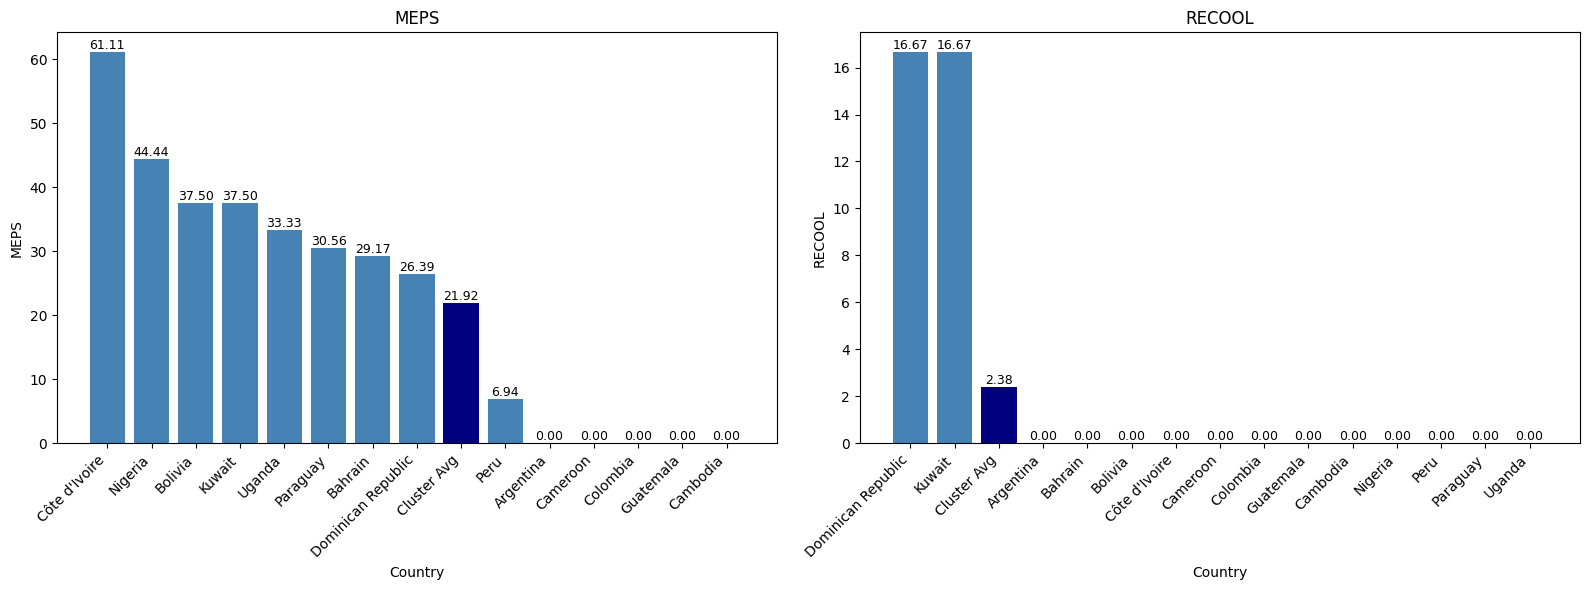

/tmp/ipykernel_170/2932653970.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_170/2932653970.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


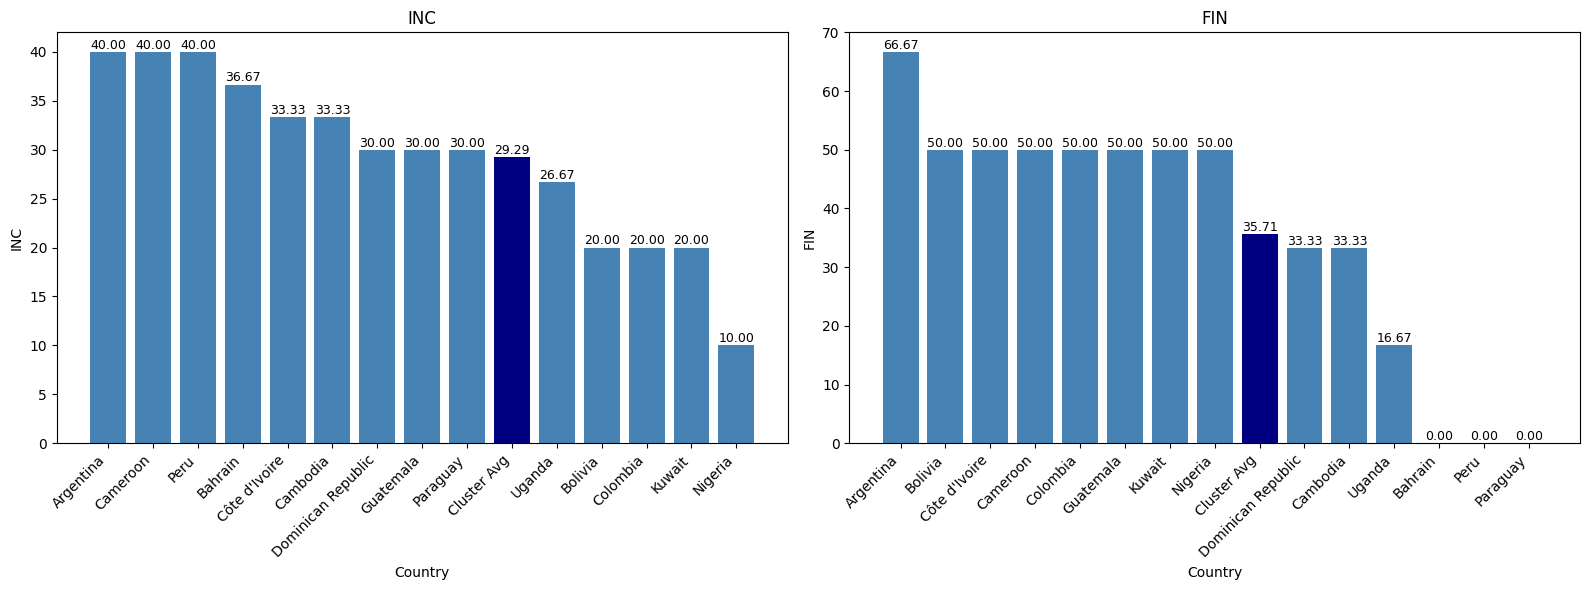

/tmp/ipykernel_170/2932653970.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_170/2932653970.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


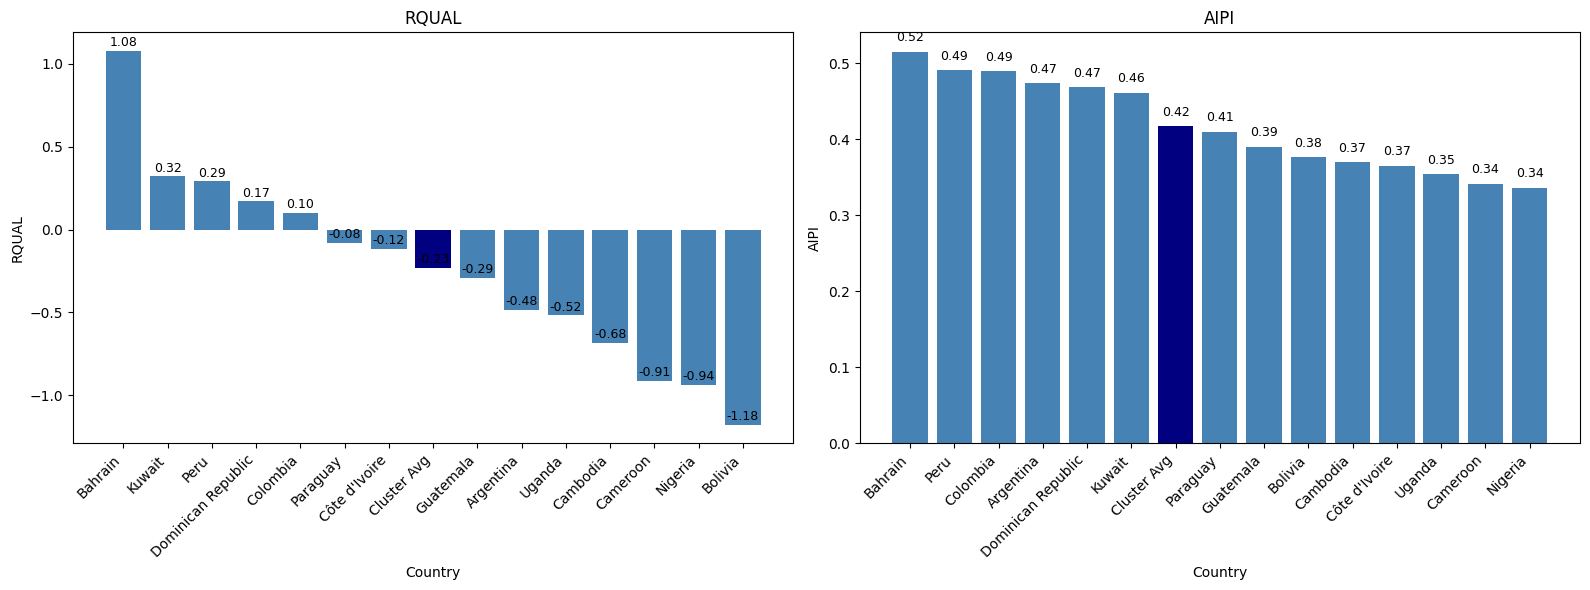

In [59]:
# Indicators grouped in pairs
indicator_pairs = [
    ("MEPS_2023", "RECOOL_2023"),
    ("INC_2023", "FIN_2023"),
    ("RQUAL_2023", "AIPI_2023")
]

# Plot pairs
for ind1, ind2 in indicator_pairs:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    for ax, indicator in zip(axes, [ind1, ind2]):
        # Get cluster data
        cluster_data = df_kmeans_PC[df_kmeans_PC["Cluster"] == 3][["COUNTRY", indicator]].copy()
        cluster_avg = cluster_data[indicator].mean()

        # Append cluster average row
        cluster_data = pd.concat([
            cluster_data,
            pd.DataFrame({"COUNTRY": ["Cluster Avg"], indicator: [cluster_avg]})
        ], ignore_index=True)

        # Sort and assign colours
        cluster_data = cluster_data.sort_values(by=indicator, ascending=False).reset_index(drop=True)
        colours = ["steelblue"] * len(cluster_data)
        cluster_avg_index = cluster_data[cluster_data["COUNTRY"] == "Cluster Avg"].index[0]
        colours[cluster_avg_index] = "navy"

        # Plot
        bars = ax.bar(cluster_data["COUNTRY"], cluster_data[indicator], color=colours)

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.01,
                f"{height:.2f}",
                ha='center', va='bottom', fontsize=9
            )

        ax.set_title(f"{indicator.replace('_2023', '')}")
        ax.set_ylabel(indicator.replace("_2023", ""))
        ax.set_xlabel("Country")
        ax.tick_params(axis='x', rotation=45)
        ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

### Cluster 4

In [52]:

# Filter by Cluster
cluster_4_data = df_kmeans_PC[df_kmeans_PC["Cluster"] == 4].copy()

# Select relevant columns
cluster_4_table = cluster_4_data[[
    "Sub-region Name", "COUNTRY",
    "MEPS_2023", "RECOOL_2023", "INC_2023","FIN_2023","RQUAL_2023", "AIPI_2023", "GDPCAPITA_2023", "TOTALHIGH_2023"
]]

# Rename to acronyms
cluster_4_table = cluster_4_table.rename(columns={
    "MEPS_2023": "MEPS",
    "RECOOL_2023": "RECOOL",
    "INC_2023": "INC",
    "FIN_2023": "FIN",
    "RQUAL_2023": "RQUAL",
    "AIPI_2023": "AIPI",
    "GDPCAPITA_2023": "GDP",
    "TOTALHIGH_2023": "RISK"
})


cluster_4_table = cluster_4_table.round(2)
cluster_4_table = cluster_4_table.sort_values(by="Sub-region Name").reset_index(drop=True)
cluster_4_table = cluster_4_table.rename(columns={"Sub-region Name": "SUB-REGION"})
cluster_avg = cluster_4_table[["MEPS", "RECOOL","INC","FIN", "RQUAL", "AIPI", "GDP","RISK"]].mean().round(2)

# Create a dictionary for the new row
summary_row = {
    "SUB-REGION": "Cluster Average",
    "COUNTRY": "",  # leave blank or use e.g. 'Average'
    "MEPS": cluster_avg["MEPS"],
    "RECOOL": cluster_avg["RECOOL"],
    "INC": cluster_avg["INC"],
    "FIN": cluster_avg["FIN"],
    "RQUAL": cluster_avg["RQUAL"],
    "AIPI": cluster_avg["AIPI"],
    "GDP": cluster_avg["GDP"],
    "RISK": cluster_avg["RISK"]
}

cluster_4_table = pd.concat(
    [cluster_4_table, pd.DataFrame([summary_row])],
    ignore_index=True
)

cluster_4_table

,SUB-REGION,COUNTRY,MEPS,RECOOL,INC,FIN,RQUAL,AIPI,GDP,RISK
0,Eastern Asia,Mongolia,0.00,50.00,50.00,50.00,-0.18,0.48,18004.85,NaN
1,Northern Africa,Tunisia,48.61,66.67,66.67,50.00,-0.62,0.47,14009.52,NaN
2,South-eastern Asia,Indonesia,47.22,38.89,43.33,50.00,0.30,0.52,15415.71,33.59
3,Southern Asia,India,83.33,71.11,77.00,50.00,-0.14,0.49,10323.50,309.18
4,Southern Asia,Sri Lanka,65.28,33.33,46.67,50.00,-0.51,0.44,14455.65,0.21
5,Southern Europe,Albania,55.56,33.33,33.33,16.67,0.17,0.53,21259.80,NaN
6,Southern Europe,Bosnia and Herzegovina,50.00,33.33,53.33,50.00,-0.14,0.43,22508.88,NaN
7,Southern Europe,North Macedonia,43.06,44.44,46.67,50.00,0.43,0.48,24386.61,NaN
8,Southern Europe,Montenegro,33.33,77.78,66.67,50.00,0.37,0.50,30596.60,NaN
9,Southern Europe,Serbia,50.00,66.67,73.33,50.00,0.14,0.54,28743.84,NaN


/tmp/ipykernel_170/742533516.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_170/742533516.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


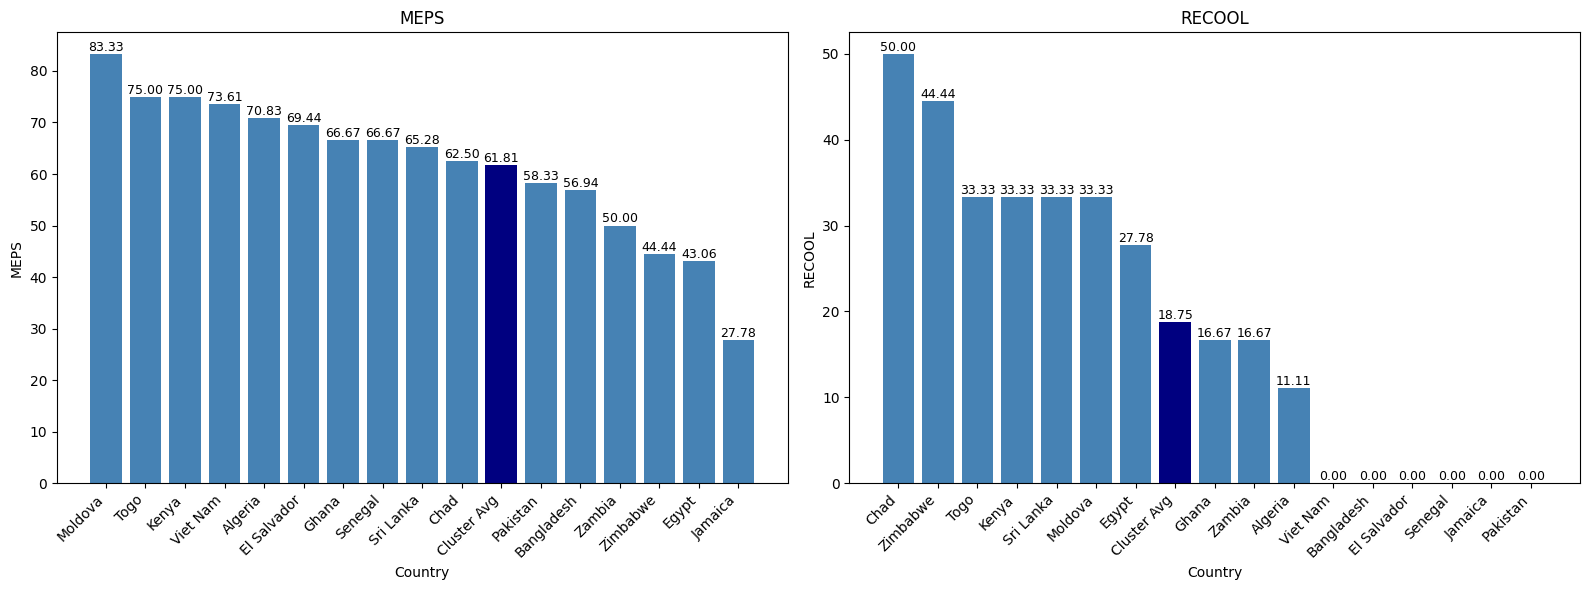

/tmp/ipykernel_170/742533516.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_170/742533516.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


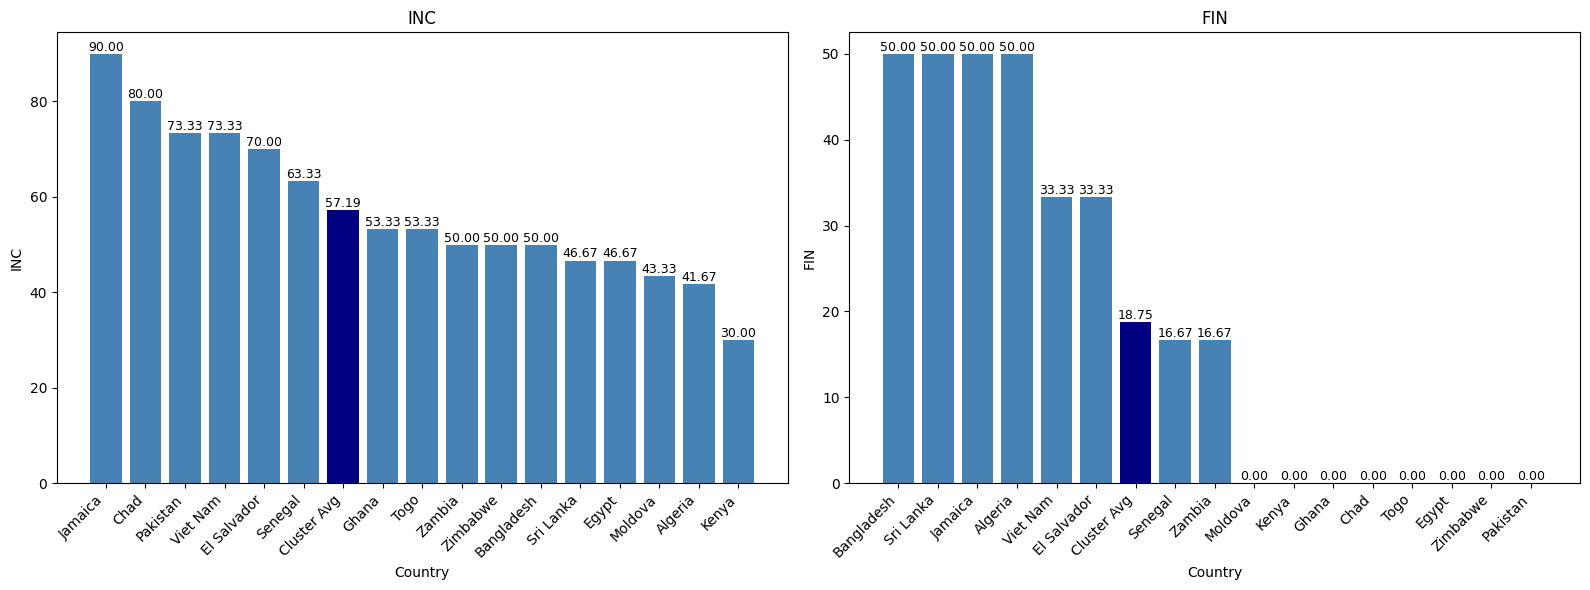

/tmp/ipykernel_170/742533516.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_170/742533516.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


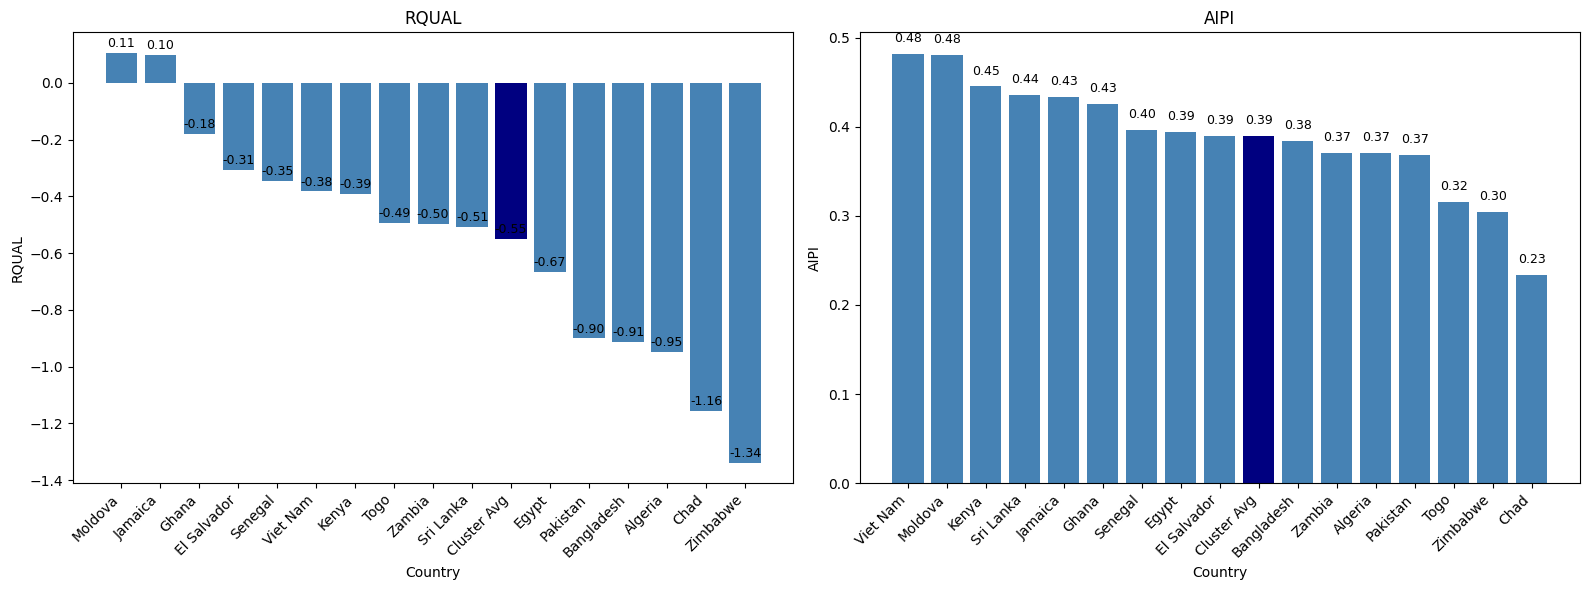

In [65]:
# Indicators grouped in pairs
indicator_pairs = [
    ("MEPS_2023", "RECOOL_2023"),
    ("INC_2023", "FIN_2023"),
    ("RQUAL_2023", "AIPI_2023")
]

# Plot pairs
for ind1, ind2 in indicator_pairs:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    for ax, indicator in zip(axes, [ind1, ind2]):
        # Get cluster data
        cluster_data = df_kmeans_PC[df_kmeans_PC["Cluster"] == 4][["COUNTRY", indicator]].copy()
        cluster_avg = cluster_data[indicator].mean()

        # Append cluster average row
        cluster_data = pd.concat([
            cluster_data,
            pd.DataFrame({"COUNTRY": ["Cluster Avg"], indicator: [cluster_avg]})
        ], ignore_index=True)

        # Sort and assign colours
        cluster_data = cluster_data.sort_values(by=indicator, ascending=False).reset_index(drop=True)
        colours = ["steelblue"] * len(cluster_data)
        cluster_avg_index = cluster_data[cluster_data["COUNTRY"] == "Cluster Avg"].index[0]
        colours[cluster_avg_index] = "navy"

        # Plot
        bars = ax.bar(cluster_data["COUNTRY"], cluster_data[indicator], color=colours)

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.01,
                f"{height:.2f}",
                ha='center', va='bottom', fontsize=9
            )

        ax.set_title(f"{indicator.replace('_2023', '')}")
        ax.set_ylabel(indicator.replace("_2023", ""))
        ax.set_xlabel("Country")
        ax.tick_params(axis='x', rotation=45)
        ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

### Cluster 5

In [53]:

# Filter by Cluster
cluster_5_data = df_kmeans_PC[df_kmeans_PC["Cluster"] == 5].copy()

# Select relevant columns
cluster_5_table = cluster_5_data[[
    "Sub-region Name", "COUNTRY",
    "MEPS_2023", "RECOOL_2023", "INC_2023","FIN_2023","RQUAL_2023", "AIPI_2023", "GDPCAPITA_2023", "TOTALHIGH_2023"
]]

# Rename to acronyms
cluster_5_table = cluster_5_table.rename(columns={
    "MEPS_2023": "MEPS",
    "RECOOL_2023": "RECOOL",
    "INC_2023": "INC",
    "FIN_2023": "FIN",
    "RQUAL_2023": "RQUAL",
    "AIPI_2023": "AIPI",
    "GDPCAPITA_2023": "GDP",
    "TOTALHIGH_2023": "RISK"
})


cluster_5_table = cluster_5_table.round(2)
cluster_5_table = cluster_5_table.sort_values(by="Sub-region Name").reset_index(drop=True)
cluster_5_table = cluster_5_table.rename(columns={"Sub-region Name": "SUB-REGION"})
cluster_avg = cluster_5_table[["MEPS", "RECOOL","INC","FIN", "RQUAL", "AIPI", "GDP","RISK"]].mean().round(2)

# Create a dictionary for the new row
summary_row = {
    "SUB-REGION": "Cluster Average",
    "COUNTRY": "",  # leave blank or use e.g. 'Average'
    "MEPS": cluster_avg["MEPS"],
    "RECOOL": cluster_avg["RECOOL"],
    "INC": cluster_avg["INC"],
    "FIN": cluster_avg["FIN"],
    "RQUAL": cluster_avg["RQUAL"],
    "AIPI": cluster_avg["AIPI"],
    "GDP": cluster_avg["GDP"],
    "RISK": cluster_avg["RISK"]
}

cluster_5_table = pd.concat(
    [cluster_5_table, pd.DataFrame([summary_row])],
    ignore_index=True
)


cluster_5_table

,SUB-REGION,COUNTRY,MEPS,RECOOL,INC,FIN,RQUAL,AIPI,GDP,RISK
0,Southern Asia,"Iran, Islamic Rep.",90.28,50.00,73.33,50.00,-1.69,0.38,17659.87,13.53
1,Sub-Saharan Africa,Mauritania,27.78,50.00,56.67,0.00,-1.00,0.23,6946.19,1.36
2,Sub-Saharan Africa,Rwanda,76.39,77.78,46.67,16.67,0.12,0.44,3399.45,NaN
3,Sub-Saharan Africa,Chad,62.50,50.00,80.00,0.00,-1.16,0.23,2931.58,8.63
4,Sub-Saharan Africa,Togo,75.00,33.33,53.33,0.00,-0.49,0.32,3071.51,3.60
5,Sub-Saharan Africa,Zimbabwe,44.44,44.44,50.00,0.00,-1.34,0.30,3820.36,NaN
6,Cluster Average,,62.73,50.92,60.00,11.11,-0.93,0.32,6304.83,6.78


/tmp/ipykernel_170/424448088.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_170/424448088.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


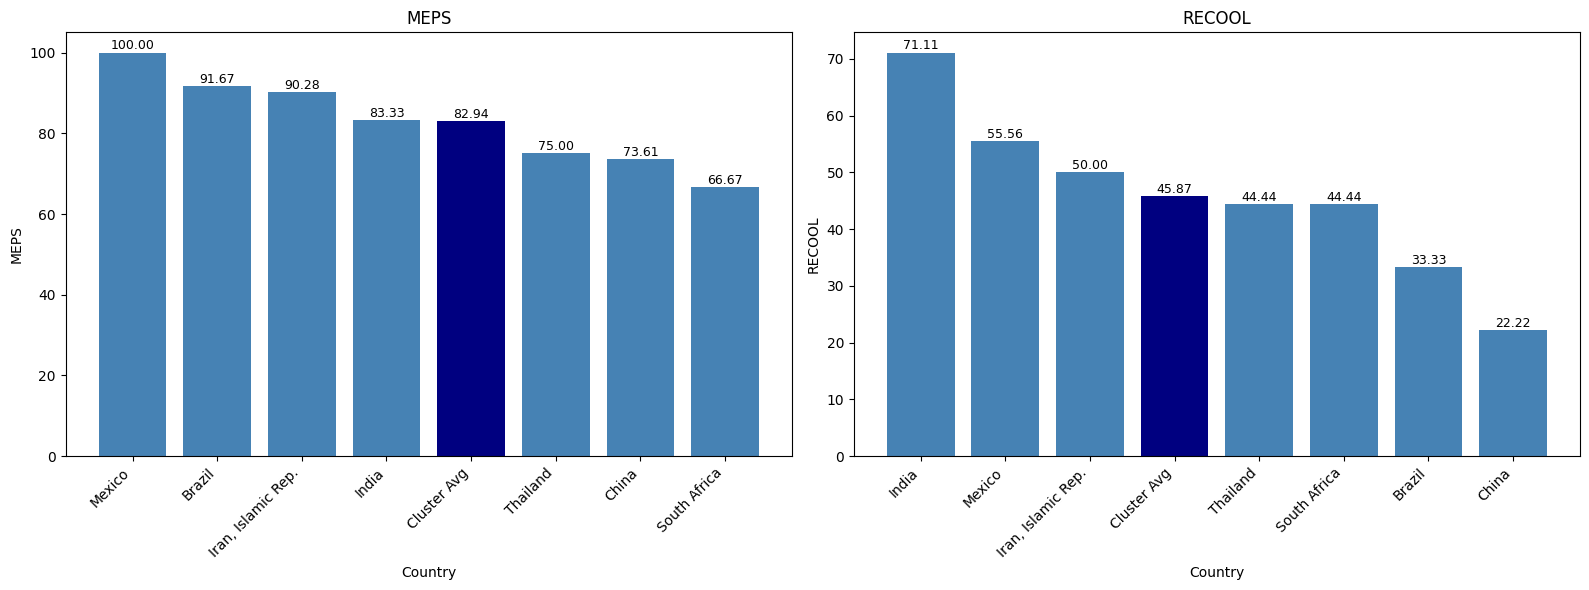

/tmp/ipykernel_170/424448088.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_170/424448088.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


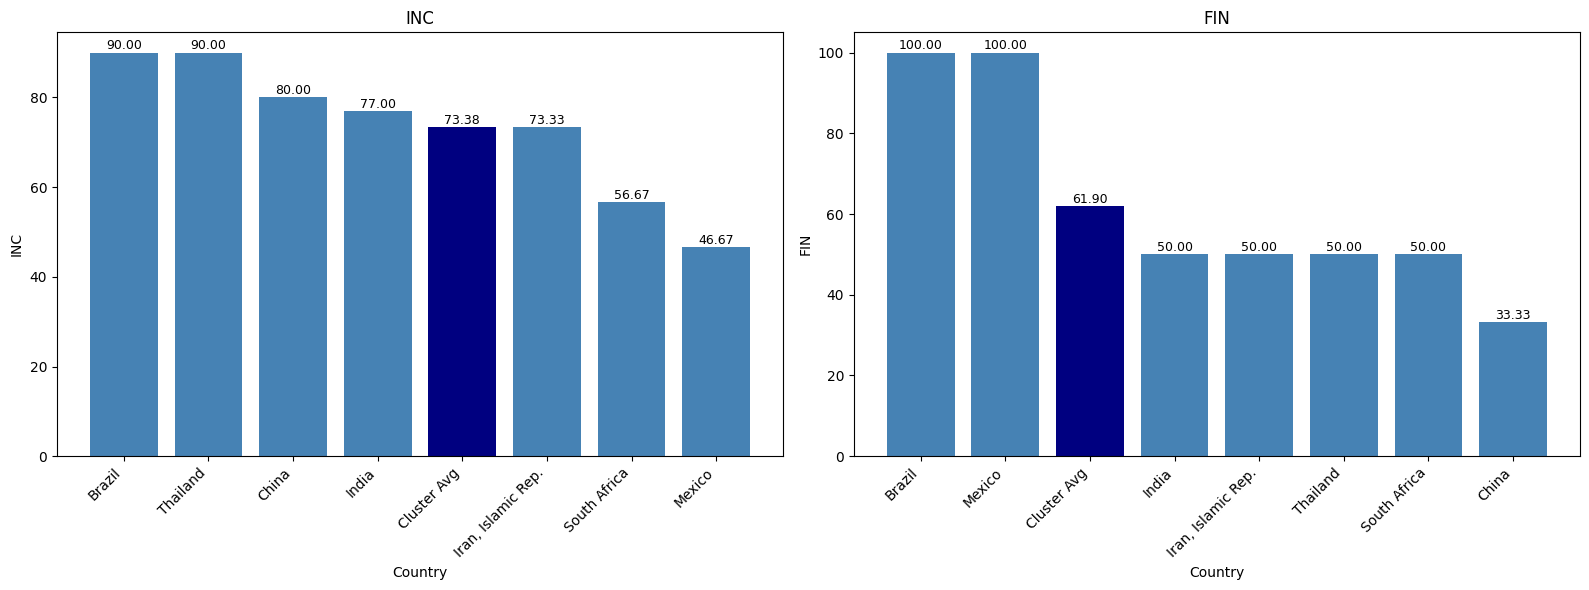

/tmp/ipykernel_170/424448088.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_170/424448088.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


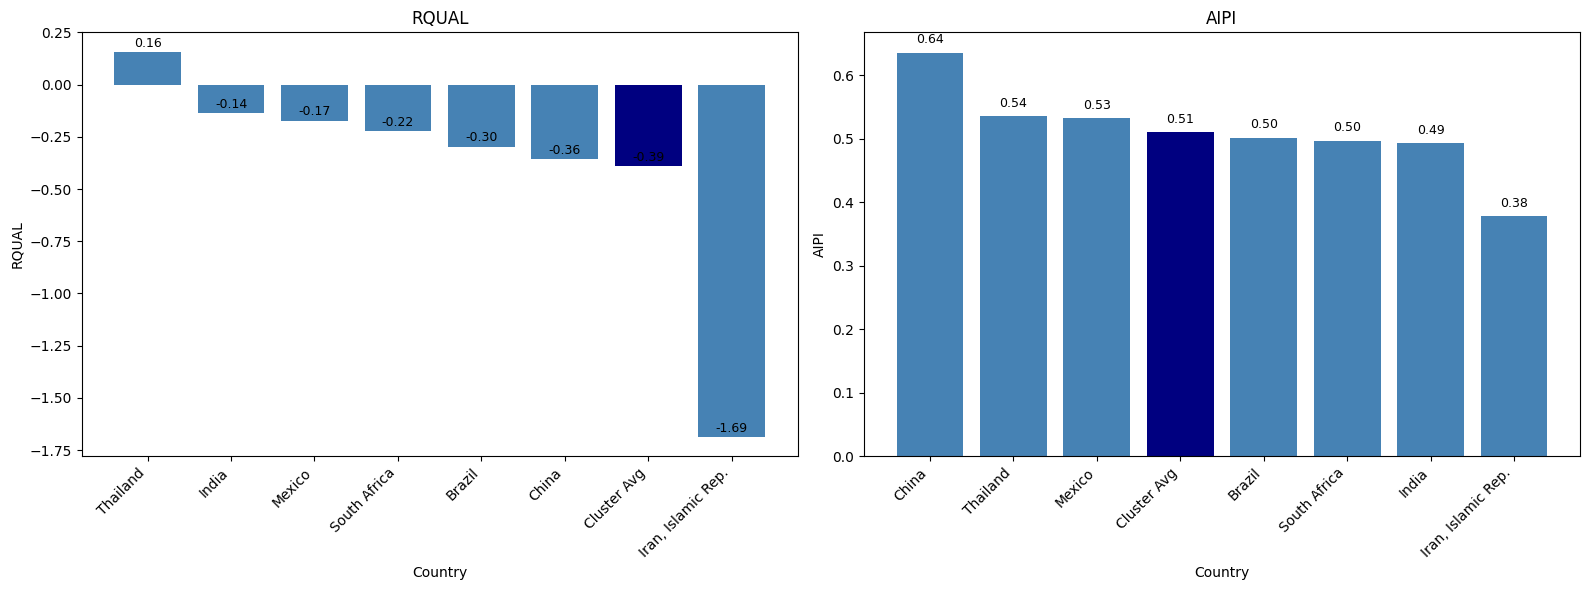

In [69]:
# Indicators grouped in pairs
indicator_pairs = [
    ("MEPS_2023", "RECOOL_2023"),
    ("INC_2023", "FIN_2023"),
    ("RQUAL_2023", "AIPI_2023")
]

# Plot pairs
for ind1, ind2 in indicator_pairs:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    for ax, indicator in zip(axes, [ind1, ind2]):
        # Get cluster data
        cluster_data = df_kmeans_PC[df_kmeans_PC["Cluster"] == 5][["COUNTRY", indicator]].copy()
        cluster_avg = cluster_data[indicator].mean()

        # Append cluster average row
        cluster_data = pd.concat([
            cluster_data,
            pd.DataFrame({"COUNTRY": ["Cluster Avg"], indicator: [cluster_avg]})
        ], ignore_index=True)

        # Sort and assign colours
        cluster_data = cluster_data.sort_values(by=indicator, ascending=False).reset_index(drop=True)
        colours = ["steelblue"] * len(cluster_data)
        cluster_avg_index = cluster_data[cluster_data["COUNTRY"] == "Cluster Avg"].index[0]
        colours[cluster_avg_index] = "navy"

        # Plot
        bars = ax.bar(cluster_data["COUNTRY"], cluster_data[indicator], color=colours)

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.01,
                f"{height:.2f}",
                ha='center', va='bottom', fontsize=9
            )

        ax.set_title(f"{indicator.replace('_2023', '')}")
        ax.set_ylabel(indicator.replace("_2023", ""))
        ax.set_xlabel("Country")
        ax.tick_params(axis='x', rotation=45)
        ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

### Cluster 6

In [54]:
# Filter by Cluster
cluster_6_data = df_kmeans_PC[df_kmeans_PC["Cluster"] == 6].copy()

# Select relevant columns
cluster_6_table = cluster_6_data[[
    "Sub-region Name", "COUNTRY",
    "MEPS_2023", "RECOOL_2023", "INC_2023","FIN_2023","RQUAL_2023", "AIPI_2023", "GDPCAPITA_2023", "TOTALHIGH_2023"
]]

# Rename to acronyms
cluster_6_table = cluster_6_table.rename(columns={
    "MEPS_2023": "MEPS",
    "RECOOL_2023": "RECOOL",
    "INC_2023": "INC",
    "FIN_2023": "FIN",
    "RQUAL_2023": "RQUAL",
    "AIPI_2023": "AIPI",
    "GDPCAPITA_2023": "GDP",
    "TOTALHIGH_2023": "RISK"
})


cluster_6_table = cluster_6_table.round(2)
cluster_6_table = cluster_6_table.sort_values(by="Sub-region Name").reset_index(drop=True)
cluster_6_table = cluster_6_table.rename(columns={"Sub-region Name": "SUB-REGION"})
cluster_avg = cluster_6_table[["MEPS", "RECOOL","INC","FIN", "RQUAL", "AIPI", "GDP","RISK"]].mean().round(2)

# Create a dictionary for the new row
summary_row = {
    "SUB-REGION": "Cluster Average",
    "COUNTRY": "",  # leave blank or use e.g. 'Average'
    "MEPS": cluster_avg["MEPS"],
    "RECOOL": cluster_avg["RECOOL"],
    "INC": cluster_avg["INC"],
    "FIN": cluster_avg["FIN"],
    "RQUAL": cluster_avg["RQUAL"],
    "AIPI": cluster_avg["AIPI"],
    "GDP": cluster_avg["GDP"],
    "RISK": cluster_avg["RISK"]
}

cluster_6_table = pd.concat(
    [cluster_6_table, pd.DataFrame([summary_row])],
    ignore_index=True
)


cluster_6_table

,SUB-REGION,COUNTRY,MEPS,RECOOL,INC,FIN,RQUAL,AIPI,GDP,RISK
0,LAC,Argentina,0.00,0.00,40.00,66.67,-0.48,0.47,30082.30,5.25
1,LAC,Colombia,0.00,0.00,20.00,50.00,0.10,0.49,20944.49,2.17
2,LAC,Dominican Republic,26.39,16.67,30.00,33.33,0.17,0.47,25839.94,0.87
3,LAC,Guatemala,0.00,0.00,30.00,50.00,-0.29,0.39,13745.36,0.40
4,LAC,Peru,6.94,0.00,40.00,0.00,0.29,0.49,17011.23,7.65
5,LAC,Paraguay,30.56,0.00,30.00,0.00,-0.08,0.41,17564.49,0.46
6,South-eastern Asia,Philippines,65.28,11.11,30.00,50.00,0.16,0.50,10985.83,19.53
7,Southern Asia,Maldives,0.00,11.11,30.00,0.00,-0.67,0.40,24735.08,NaN
8,Western Asia,Bahrain,29.17,0.00,36.67,0.00,1.08,0.52,64171.09,NaN
9,Western Asia,Kuwait,37.50,16.67,20.00,50.00,0.32,0.46,53025.47,NaN


/tmp/ipykernel_170/3934140490.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_170/3934140490.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


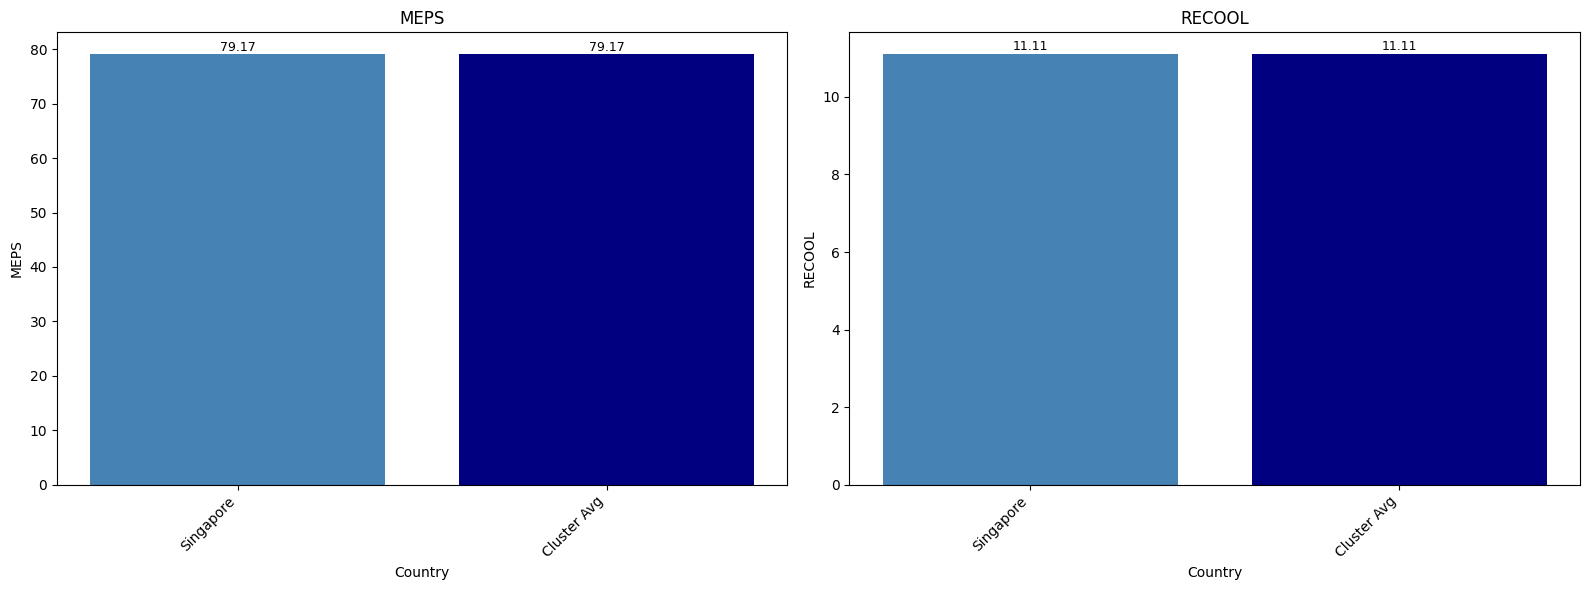

/tmp/ipykernel_170/3934140490.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_170/3934140490.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


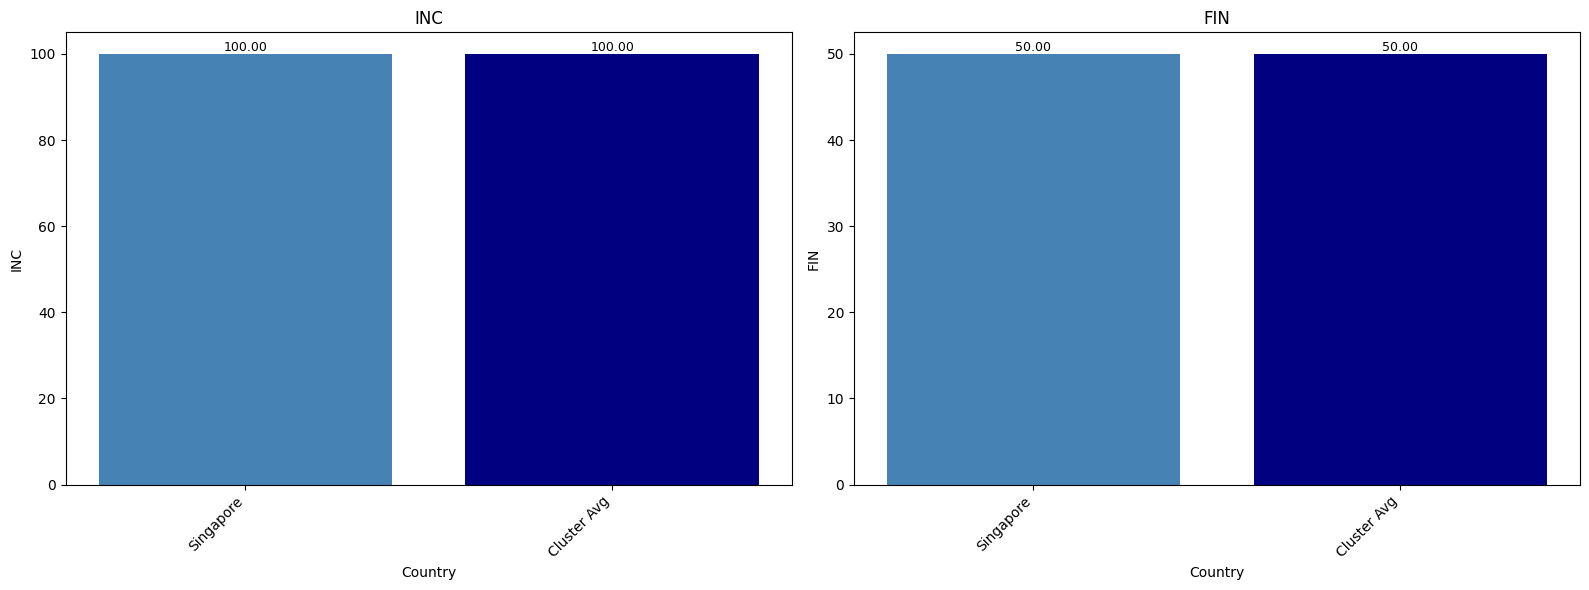

/tmp/ipykernel_170/3934140490.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')
/tmp/ipykernel_170/3934140490.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')


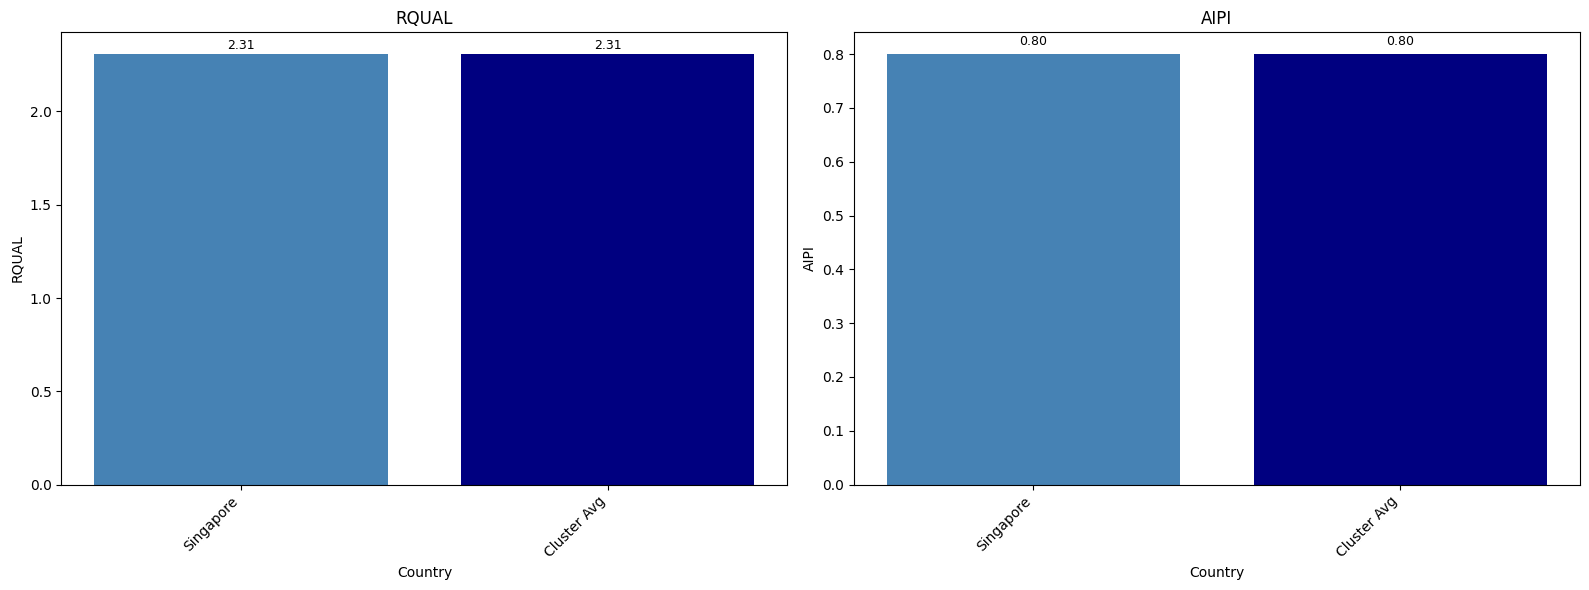

In [70]:
# Indicators grouped in pairs
indicator_pairs = [
    ("MEPS_2023", "RECOOL_2023"),
    ("INC_2023", "FIN_2023"),
    ("RQUAL_2023", "AIPI_2023")
]

# Plot pairs
for ind1, ind2 in indicator_pairs:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    for ax, indicator in zip(axes, [ind1, ind2]):
        # Get cluster data
        cluster_data = df_kmeans_PC[df_kmeans_PC["Cluster"] == 6][["COUNTRY", indicator]].copy()
        cluster_avg = cluster_data[indicator].mean()

        # Append cluster average row
        cluster_data = pd.concat([
            cluster_data,
            pd.DataFrame({"COUNTRY": ["Cluster Avg"], indicator: [cluster_avg]})
        ], ignore_index=True)

        # Sort and assign colours
        cluster_data = cluster_data.sort_values(by=indicator, ascending=False).reset_index(drop=True)
        colours = ["steelblue"] * len(cluster_data)
        cluster_avg_index = cluster_data[cluster_data["COUNTRY"] == "Cluster Avg"].index[0]
        colours[cluster_avg_index] = "navy"

        # Plot
        bars = ax.bar(cluster_data["COUNTRY"], cluster_data[indicator], color=colours)

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.01,
                f"{height:.2f}",
                ha='center', va='bottom', fontsize=9
            )

        ax.set_title(f"{indicator.replace('_2023', '')}")
        ax.set_ylabel(indicator.replace("_2023", ""))
        ax.set_xlabel("Country")
        ax.tick_params(axis='x', rotation=45)
        ax.set_xticklabels(cluster_data["COUNTRY"], rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

### Cluster 7

In [56]:
# Filter by Cluster
cluster_7_data = df_kmeans_PC[df_kmeans_PC["Cluster"] == 7].copy()

# Select relevant columns
cluster_7_table = cluster_7_data[[
    "Sub-region Name", "COUNTRY",
    "MEPS_2023", "RECOOL_2023", "INC_2023","FIN_2023","RQUAL_2023", "AIPI_2023", "GDPCAPITA_2023", "TOTALHIGH_2023"
]]

# Rename to acronyms
cluster_7_table = cluster_7_table.rename(columns={
    "MEPS_2023": "MEPS",
    "RECOOL_2023": "RECOOL",
    "INC_2023": "INC",
    "FIN_2023": "FIN",
    "RQUAL_2023": "RQUAL",
    "AIPI_2023": "AIPI",
    "GDPCAPITA_2023": "GDP",
    "TOTALHIGH_2023": "RISK"
})


cluster_7_table = cluster_7_table.round(2)
cluster_7_table = cluster_7_table.sort_values(by="Sub-region Name").reset_index(drop=True)
cluster_7_table = cluster_7_table.rename(columns={"Sub-region Name": "SUB-REGION"})
cluster_avg = cluster_7_table[["MEPS", "RECOOL","INC","FIN", "RQUAL", "AIPI", "GDP","RISK"]].mean().round(2)

# Create a dictionary for the new row
summary_row = {
    "SUB-REGION": "Cluster Average",
    "COUNTRY": "",  # leave blank or use e.g. 'Average'
    "MEPS": cluster_avg["MEPS"],
    "RECOOL": cluster_avg["RECOOL"],
    "INC": cluster_avg["INC"],
    "FIN": cluster_avg["FIN"],
    "RQUAL": cluster_avg["RQUAL"],
    "AIPI": cluster_avg["AIPI"],
    "GDP": cluster_avg["GDP"],
    "RISK": cluster_avg["RISK"]
}

cluster_7_table = pd.concat(
    [cluster_7_table, pd.DataFrame([summary_row])],
    ignore_index=True
)


cluster_7_table

,SUB-REGION,COUNTRY,MEPS,RECOOL,INC,FIN,RQUAL,AIPI,GDP,RISK
0,Eastern Europe,Moldova,83.33,33.33,43.33,0.00,0.11,0.48,17746.94,NaN
1,LAC,Jamaica,27.78,0.00,90.00,50.00,0.10,0.43,11466.97,NaN
2,LAC,El Salvador,69.44,0.00,70.00,33.33,-0.31,0.39,12679.58,0.03
3,Melanesia,Vanuatu,55.56,0.00,43.33,0.00,-0.12,0.29,3460.93,NaN
4,Northern Africa,Egypt,43.06,27.78,46.67,0.00,-0.67,0.39,18524.84,2.73
5,South-eastern Asia,Viet Nam,73.61,0.00,73.33,33.33,-0.38,0.48,15033.88,2.23
6,Southern Asia,Pakistan,58.33,0.00,73.33,0.00,-0.90,0.37,6036.64,45.27
7,Sub-Saharan Africa,Ghana,66.67,16.67,53.33,0.00,-0.18,0.43,7556.42,12.95
8,Sub-Saharan Africa,Kenya,75.00,33.33,30.00,0.00,-0.39,0.45,6307.23,9.57
9,Sub-Saharan Africa,Senegal,66.67,0.00,63.33,16.67,-0.35,0.40,4777.61,3.51


### Cluster 8

In [57]:
# Filter by Cluster
cluster_8_data = df_kmeans_PC[df_kmeans_PC["Cluster"] == 8].copy()

# Select relevant columns
cluster_8_table = cluster_8_data[[
    "Sub-region Name", "COUNTRY",
    "MEPS_2023", "RECOOL_2023", "INC_2023","FIN_2023","RQUAL_2023", "AIPI_2023", "GDPCAPITA_2023", "TOTALHIGH_2023"
]]

# Rename to acronyms
cluster_8_table = cluster_8_table.rename(columns={
    "MEPS_2023": "MEPS",
    "RECOOL_2023": "RECOOL",
    "INC_2023": "INC",
    "FIN_2023": "FIN",
    "RQUAL_2023": "RQUAL",
    "AIPI_2023": "AIPI",
    "GDPCAPITA_2023": "GDP",
    "TOTALHIGH_2023": "RISK"
})


cluster_8_table = cluster_8_table.round(2)
cluster_8_table = cluster_8_table.sort_values(by="Sub-region Name").reset_index(drop=True)
cluster_8_table = cluster_8_table.rename(columns={"Sub-region Name": "SUB-REGION"})
cluster_avg = cluster_8_table[["MEPS", "RECOOL","INC","FIN", "RQUAL", "AIPI", "GDP","RISK"]].mean().round(2)

# Create a dictionary for the new row
summary_row = {
    "SUB-REGION": "Cluster Average",
    "COUNTRY": "",  # leave blank or use e.g. 'Average'
    "MEPS": cluster_avg["MEPS"],
    "RECOOL": cluster_avg["RECOOL"],
    "INC": cluster_avg["INC"],
    "FIN": cluster_avg["FIN"],
    "RQUAL": cluster_avg["RQUAL"],
    "AIPI": cluster_avg["AIPI"],
    "GDP": cluster_avg["GDP"],
    "RISK": cluster_avg["RISK"]
}

cluster_8_table = pd.concat(
    [cluster_8_table, pd.DataFrame([summary_row])],
    ignore_index=True
)


cluster_8_table

,SUB-REGION,COUNTRY,MEPS,RECOOL,INC,FIN,RQUAL,AIPI,GDP,RISK
0,South-eastern Asia,Singapore,79.17,11.11,100.0,50.0,2.31,0.8,143786.14,NaN
1,Cluster Average,,79.17,11.11,100.0,50.0,2.31,0.8,143786.14,NaN
